# Introduction
For the project work I used GIT and It had multiple separate python files (to implement functionalities and run trainings) and notebook files (to evaluate the results). This repository is available here:

https://github.com/macsaba/concrete_crack_thesis

This notebook contains the implemented functionalities (available in the src/folder), the trainings run and the evaluation done.

This works  explores automated concrete crack segmentation using deep learning. A U-Net architecture was trained on the DeepCrack dataset, and pre-trained ResNet and SWIN Transformer based architectures were used for transfer learning. These models were evaluated with different hyperparameter settings, and the results were compared.

# Functionalities
This part contains the content of the src/ folder in the git repository. These can be general purpose functionalities (e.g. logging, plotting) but also the data pipeline, the implemented models and training loops are available here. This is the first part because the rest of the project use these functionalities.

### `__init__.py`

### `plotting.py`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_mask_grid(pairs, columns=3, scale = 6, path = None):
    """
    Plots image-mask pairs in a grid.

    Parameters:
        pairs: List of (image, mask) tuples, where image and mask are numpy arrays in HWC format.
        columns: Number of image-mask columns per row.
        figsize: Size of each column in inches (width, height).
        path: Optional path to save the figure.
    """
    rows = int(np.ceil(len(pairs) / columns))

    # calculate image size
    im_H = pairs[0][0].shape[0]
    im_W = pairs[0][0].shape[1]
    padding = im_W/10
    fig_W = columns * 2 * im_W + (columns * 2 +1)*padding
    fig_H = rows*im_H + (rows+1)*padding
    # norm and scale
    fig_W = fig_W/fig_H*scale
    fig_H = scale
    fig, axs = plt.subplots(rows, columns * 2, figsize=(fig_W, fig_H))
    #fig, axs = plt.subplots(rows, columns * 2)

    if rows == 1:
        axs = np.expand_dims(axs, 0)  # handle single-row case

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 2]
        ax_mask = axs[row, col * 2 + 1]

        if i < len(pairs):
            image, mask = pairs[i]
            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')
        else:
            # Empty subplot if not enough data
            ax_img.axis('off')
            ax_mask.axis('off')

        # Write 'image' and 'mask' labels below empty subplots
        if i < columns:
            ax_img.set_title('Image', fontsize=20*scale/10)
            ax_mask.set_title('Ground truth', fontsize=20*scale/10)
    #plt.subplots_adjust(hspace=0.1, wspace=0.1)  # finer manual control

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_image_mask_prediction_grid(triplets, columns=3, scale=6, path=None):
    """
    Plots image-mask-prediction triplets in a grid.

    Parameters:
        triplets: List of (image, mask, prediction) tuples, where each element is a numpy array in HWC or HW format.
        columns: Number of image sets per row.
        scale: Scaling factor for figure size.
        path: Optional path to save the figure.
    """
    rows = int(np.ceil(len(triplets) / columns))

    # Image dimensions
    im_H = triplets[0][0].shape[0]
    im_W = triplets[0][0].shape[1]
    padding = im_W / 10
    fig_W = columns * 3 * im_W + (columns * 3 + 1) * padding
    fig_H = rows * im_H + (rows + 1) * padding

    # Normalize and scale figure size
    fig_W = fig_W / fig_H * scale
    fig_H = scale

    fig, axs = plt.subplots(rows, columns * 3, figsize=(fig_W, fig_H))

    if rows == 1:
        axs = np.expand_dims(axs, 0)  # handle single-row case

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 3]
        ax_mask = axs[row, col * 3 + 1]
        ax_pred = axs[row, col * 3 + 2]

        if i < len(triplets):
            image, mask, pred = triplets[i]

            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')

            ax_pred.imshow(pred.squeeze(), cmap='gray')
            ax_pred.axis('off')
        else:
            ax_img.axis('off')
            ax_mask.axis('off')
            ax_pred.axis('off')

        # Add titles only for the first row
        if i < columns:
            ax_img.set_title('Image', fontsize=20 * fig_W / 10)
            ax_mask.set_title('Ground Truth', fontsize=20 * fig_W / 10)
            ax_pred.set_title('Prediction', fontsize=20 * fig_W / 10)

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_image_mask_prediction_grid_with_dice(triplets, columns=3, scale=6, path=None):
    """
    Plots image-mask-prediction triplets with Dice score in a grid.

    Parameters:
        triplets: List of (image, mask, prediction, dice_score) tuples.
        columns: Number of image sets per row.
        scale: Scaling factor for figure size.
        path: Optional path to save the figure.
    """
    rows = int(np.ceil(len(triplets) / columns))

    im_H = triplets[0][0].shape[0]
    im_W = triplets[0][0].shape[1]
    padding = im_W / 10
    fig_W = columns * 3 * im_W + (columns * 3 + 1) * padding
    fig_H = rows * im_H + (rows + 1) * padding

    fig_W = fig_W / fig_H * scale
    fig_H = scale

    fig, axs = plt.subplots(rows, columns * 3, figsize=(fig_W, fig_H))

    if rows == 1:
        axs = np.expand_dims(axs, 0)

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 3]
        ax_mask = axs[row, col * 3 + 1]
        ax_pred = axs[row, col * 3 + 2]

        if i < len(triplets):
            image, mask, pred, dice = triplets[i]

            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')

            ax_pred.imshow(pred.squeeze(), cmap='gray')
            ax_pred.axis('off')

            # Display provided Dice score
            ax_pred.text(0.5, -0.15, f"Dice: {dice:.3f}", transform=ax_pred.transAxes,
                         ha='center', va='top', fontsize=10, color='black')

        else:
            ax_img.axis('off')
            ax_mask.axis('off')
            ax_pred.axis('off')

        if i < columns:
            ax_img.set_title('Image', fontsize=20 * fig_W / 10)
            ax_mask.set_title('Ground Truth', fontsize=20 * fig_W / 10)
            ax_pred.set_title('Prediction', fontsize=20 * fig_W / 10)

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()

### `utils.py`

In [2]:
import pandas as pd
import os
import numpy as np
import torch

def log_training_result(csv_path, new_row):
    """
    Logs a training result to a CSV file using pandas.

    Parameters:
        csv_path (str): Path to the CSV file.
        new_row (dict): Dictionary of training values to log. 
                        Keys are column names; values are the record values.
    """
    # Load existing CSV or create new DataFrame
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
    else:
        df = pd.DataFrame()

    # Add missing columns from new_row
    for key in new_row:
        if key not in df.columns:
            df[key] = None  # or pd.NA

    # Ensure all columns are included in the new row (missing cols = None)
    for col in df.columns:
        if col not in new_row:
            new_row[col] = None

    # Append the new row
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

    # Save it back to CSV
    df.to_csv(csv_path, index=False)

def save_model_files(files_path, model_weights, np_arrays, override = False):
    """
    Save the results of the training

    Parameters:
        files_path (str): Path to the files.
        model_weights (dict): Model weights to save
        np_arrays (dict):   Numpy arrays to save (e.g. train losses). 
                            Keys are the file names, values are the np arrays.
        override: If it is false, an already existing folder can not be override.
    """

    if os.path.exists(files_path) and not override:
        raise FileExistsError('Files path already exists.')
    else:
        # Create the directory
        os.makedirs(files_path, exist_ok=True)
        for key, value in model_weights.items():
            torch.save(value, files_path + key + '.pth')
        for key, value in np_arrays.items():
            value_np = np.array(value)
            np.save(files_path + key + '.npy', value_np)


def generate_latex_table(dataset, name):
    """
    generates latex table from pandas dataset
    .g. generate_latex_table(results_table_log_reg, './tables/table1.tex')
    """
    latex_output = dataset.to_latex(index=False, column_format='|' + 'c|'*dataset.shape[1], float_format="%.3f")
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")
    latex_output = '\\resizebox{\\textwidth}{!}{\n' + latex_output + '}'

    # Save tables to LaTeX files
    with open(name, "w") as f:
        f.write(latex_output)

def generate_latex_table_thesis(dataset, name):
    """
    generates latex table from pandas dataset in the format used in the thesis
    e.g. generate_latex_table(results_table_log_reg, './tables/table1.tex')
    """
    latex_output = dataset.to_latex(index=False, column_format='|' + 'c|'*dataset.shape[1], float_format="%.3f")
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")
    latex_output = latex_output.replace("_", "\_")

    # Save tables to LaTeX files
    with open(name, "w") as f:
        f.write(latex_output)

def generate_latex_table_thesis2(dataset, name):
    """
    generates latex table from pandas dataset in the format used in the thesis
    e.g. generate_latex_table(results_table_log_reg, './tables/table1.tex')
    """
    # Copy to avoid modifying original
    dataset = dataset.copy()

    # Escape underscores in column names
    dataset.columns = [str(col).replace('_', '\\_') for col in dataset.columns]

    # Escape underscores in all string values in the dataset
    for col in dataset.columns:
        dataset[col] = dataset[col].apply(
            lambda x: x.replace('_', '\\_') if isinstance(x, str) else x
        )

    # Generate LaTeX table
    latex_output = dataset.to_latex(
        index=False,
        column_format='|' + 'c|' * dataset.shape[1],
        float_format="%.3f",
        escape=False  # Disable default escaping since we manually handle it
    )

    # Beautify table for thesis style
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")

    # Write LaTeX code to file
    with open(name, "w") as f:
        f.write(latex_output)

def count_trainable_parameters(model):
    """
    This function returns the number of trainable parameters in a PyTorch model.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def to_4_significant_digits(x):
    """
    Convert a number to 4 signifiant digits
    """
    return format(x, ".4g")


<>:85: SyntaxWarning: invalid escape sequence '\_'
<>:85: SyntaxWarning: invalid escape sequence '\_'
C:\Users\Csaba\AppData\Local\Temp\ipykernel_13616\3811130035.py:85: SyntaxWarning: invalid escape sequence '\_'
  latex_output = latex_output.replace("_", "\_")


### `data\dataset.py`

In [3]:
#from albumentations.pytorch.transforms import ToTensorV2
from albumentations import (
    RandomCrop,
    Rotate,
    Normalize,
    Compose,
    ToTensorV2
)
import numpy as np
from torch.utils import data
from torch.utils.data import random_split
import os
import torch
from PIL import Image


def load_data_deep_crack(image_dir, mask_dir, train_test_lengths, limit_im_nr = None, shuffle_train = True):
    """
    Function for loading the DeepCrack dataset. Implements trandformations, trai-validation cut, etc.
    
    Parameters:
        image_dir: Path for images.
        mask_dir: Path for masks.
        train_test_lengths: A list containing the ratio of train and validation data. 
        limit_im_nr: With this parameter, the number of files read can be limited.
        shuffle_train: Enables or disables shuffle of the train dataset.
    
    Returns:
        The train and validation dataloaders and the DataSets
    """

    # Get image list from the given train folder
    images_list = sorted(os.listdir(image_dir))
    # do random train test cut on this list
    train_images_list, val_images_list = random_split(images_list, train_test_lengths, generator=torch.Generator().manual_seed(42))
    #train_images_list, val_images_list = random_split(images_list, train_test_lengths)

    print(f'This gives us {len(train_images_list)} train and {len(val_images_list)} validation samples.')

    if limit_im_nr:
        # keep only limit_im_nr images, for testing
        train_images_list = list(train_images_list)[0:limit_im_nr]
        val_images_list = list(val_images_list)[0:limit_im_nr]

    # augmentations
    train_trsfs = Compose([
                       #augmentations.transforms.PadIfNeeded(min_height = 288, min_width = 288, value = 1, border_mode = 0),
                       RandomCrop(384, 544),
                       Rotate(limit = 15, p = 1, border_mode = 0),
                       Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)),
                       ToTensorV2()
    ])
    val_trsfs = Compose([Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)), ToTensorV2()])

    train_dataset = DeepCrackDataset(
        image_dir=image_dir,
        mask_dir=mask_dir,
        image_list = train_images_list,
        transform=train_trsfs
    )

    val_dataset = DeepCrackDataset(
        image_dir=image_dir,
        mask_dir=mask_dir,
        image_list = val_images_list,
        transform=val_trsfs
    )


    train_dl = data.DataLoader(train_dataset, batch_size = 4, shuffle = shuffle_train)
    val_dl = data.DataLoader(val_dataset, batch_size = 4, shuffle = False)
    return train_dl, val_dl, train_dataset, val_dataset

# Dataset class for the DeepCrack dataset
class DeepCrackDataset(data.Dataset):
    def __init__(self, image_dir, mask_dir, image_list = None, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        if image_list:
            # if we have an image list set it
            self.images = image_list
        else:
            # else set all image as image list
            self.images = sorted(os.listdir(image_dir))
        if transform:
            self.transform = transform
        else:
            self.transform = Compose(ToTensorV2())
        self.transform_backup = self.transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '.png'))

        img = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"))  # grayscale mask

        # Rotate if orientation is wrong (width > height)
        if img.shape[0] > img.shape[1]:  # shape = (H, W, C)
            img = np.rot90(img)
            mask = np.rot90(mask)

        bundle = dict(image = img, mask = mask)
        if self.transform:
            bundle = self.transform(**bundle)
            bundle['mask'] = torch.div(bundle['mask'].unsqueeze(0), 255)
        return bundle
    
    # Auxilary functions to handle the images easier.

    # Returns the file name of the image with the given index. 
    def get_image_name(self, idx):
        return self.images[idx]
    
    # Returns an item referenced by the image file name.
    def get_item_by_name(self, name):
        try:
            idx = self.images.index(name)
        except ValueError:
            raise KeyError(f"Image '{name}' not found in dataset.")
        return self[idx]
    
    # Returns the image-mask pair, as np arrays. Useful for plotting.
    def get_image_and_mask(self, index):
        bundle = self[index]
        image = np.transpose(np.array(bundle['image']), (1, 2, 0))
        mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))
        return image, mask
    
    # Returns the image-mask pair, as np arrays, referenced by the image file name. Useful for plotting.
    def get_image_and_mask_by_name(self, name):
        bundle = self.get_item_by_name(name)
        image = np.transpose(np.array(bundle['image']), (1, 2, 0))
        mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))
        return image, mask
    
    # With these functions, transform can be enabled/disabled on the dataset. Useful for evaluation.
    # Enables the transform.
    def enable_transform(self):
        self.transform = self.transform_backup
    
    # Disables the transform.
    def disable_transform(self):
        self.transform_backup = self.transform
        self.transform = Compose(ToTensorV2())


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


### `models\unet.py`

In [4]:
# This implementation is from the deep learning practice

import torch
from torch import nn
from torch.nn.functional import relu

# U-Net convolution block
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x

# U-Net up-convolution block 
class UpConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        if in_channels != 2 * out_channels:
            raise ValueError(f'In channel size should be twice out channel size, but got {in_channels} and {out_channels}.')
            # NOTE: technically it would be sufficient that the in channels of the convolutional block is equal to
            #       the out channels of the up convolution + the channel size of the lateral skip connection

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(in_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate

        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)

        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x

# Complete U-Net model architecture
class UNet(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64,
                 depth = 5 # number of levels (including bottom block)
                 ):

        super().__init__()

        channel_sizes = [base_channel_size * 2 ** i for i in range(depth)]

        down_in_channels = (img_channels, *channel_sizes[:-2])
        down_out_channels = channel_sizes[:-1]

        self.down_blocks = nn.ModuleList(ConvBlock(in_channels, out_channels) for in_channels, out_channels in zip (down_in_channels, down_out_channels))
        self.bottom_block = ConvBlock(*channel_sizes[-2:])

        up_in_channels = channel_sizes[-1:0:-1]
        up_out_channels = channel_sizes[-2::-1]

        self.up_blocks = nn.ModuleList(UpConvBlock(in_channels, out_channels) for in_channels, out_channels in zip (up_in_channels, up_out_channels))

        self.segmentation_layer = nn.Conv2d(in_channels = base_channel_size, out_channels = mask_channels, kernel_size = 1)

        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):

        lateral_skip_vals = []

        for down_block in self.down_blocks:
            x = down_block(x)
            lateral_skip_vals.append(x) # gather outputs of blocks to be passed through the lateral skip connections
            x = self.max_pool(x)

        x = self.bottom_block(x)

        for up_block in self.up_blocks:
            x = up_block(x, lateral_skip_vals.pop()) # list.pop() returns the last element by default

        x = self.segmentation_layer(x)

        return self.activation(x)

### `models\unet_resnet34.py`

In [5]:
import torch
from torch import nn
from torch.nn.functional import relu
from torchvision import models
import os

# pre-trained ResNet encoder
class ResNetEncoder(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        resnet = models.resnet34(pretrained=pretrained)

        self.initial = nn.Sequential(
            resnet.conv1,  # H/2
            resnet.bn1,
            resnet.relu,
        )
        self.maxpool = resnet.maxpool           # H/4
        self.encoder1 = resnet.layer1           # H/4
        self.encoder2 = resnet.layer2           # H/8
        self.encoder3 = resnet.layer3           # H/16
        self.encoder4 = resnet.layer4           # H/32

    def forward(self, x):
        x0 = self.initial(x)        # (B, 64, H/2, W/2)
        x1 = self.maxpool(x0)       # (B, 64, H/4, W/4)
        x2 = self.encoder1(x1)      # (B, 64, H/4, W/4)
        x3 = self.encoder2(x2)      # (B, 128, H/8, W/8)
        x4 = self.encoder3(x3)      # (B, 256, H/16, W/16)
        x5 = self.encoder4(x4)      # (B, 512, H/32, W/32)
        return [x0, x2, x3, x4, x5]  # Return skip features

# U-Net convolution block
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x

# U-Net up-convolution block
class UpConvBlock_resnet(nn.Module):
    def __init__(self, in_channels, skip_channels, out_channels):
        super().__init__()

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(out_channels + skip_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate
        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)
        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x

# Complete model architecture
class UNetResNet34(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64
                 ):
        # TODO: implement automatic channel size calculations
        
        super().__init__()

        # ZEROth SKIP PART, to get the uppest skip connection
        skip0_ch_size = 24
        self.stem = nn.Sequential(
            nn.Conv2d(img_channels, skip0_ch_size, kernel_size=3, padding=1),
            nn.BatchNorm2d(skip0_ch_size),
            nn.ReLU(inplace=True),
        )

        # ENCODER PART
        self.encoder = ResNetEncoder()
        
        # CENTER PART
        self.bottom_block = ConvBlock(512, 512)

        # DECODER PART
        up_in_channels = [512, 256, 128, 64, 48]
        up_out_channels = [256, 128, 64, 48, 24]
        up_skip_channels = [256, 128, 64, 64, 24]

        self.up_blocks = nn.ModuleList(UpConvBlock_resnet(in_channels, skip_channel, out_channels) for in_channels, out_channels, skip_channel in zip (up_in_channels, up_out_channels, up_skip_channels))

        # OUTPUT PART
        self.segmentation_layer = nn.Conv2d(in_channels = skip0_ch_size, out_channels = mask_channels, kernel_size = 1)
        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        # INIT PART, to get the uppest skip connection
        x_stem = self.stem(x)   # (B, 64, H, W) ← use this as the top skip connection
        # ENCODER PART
        lateral_skip_vals = self.encoder(x)  # lateral_skip_vals =  x0, x1, x2, x3, x4
        
        lateral_skip_vals.insert(0, x_stem)
        # CENTER PART
        #print('Shape: ', lateral_skip_vals.pop().shape())
        x = self.bottom_block(lateral_skip_vals.pop())  # list.pop() returns the last element by default
        # DECODER PART
        for up_block in self.up_blocks:
            skip_x = lateral_skip_vals.pop()
            x = up_block(x, skip_x) # list.pop() returns the last element by default
        
        # OUTPUT PART
        x = self.segmentation_layer(x)

        return self.activation(x)
    
    # Freeze encoder layers for training
    # If there are no specific layers, freeze all
    def freeze_encoder_layers(self, layers_to_freeze=None):
        if layers_to_freeze is None:
            # Freeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = False
        else:
            # Freeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for freeze_name in layers_to_freeze:
                    if freeze_name in name:
                        param.requires_grad = False

    # unfreeze encoder layers for training
    # if there are no specific layers, unfreeze all
    def unfreeze_encoder_layers(self, layers_to_unfreeze=None):
        if layers_to_unfreeze is None:
            # Unfreeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = True
        else:
            # Unfreeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for unfreeze_name in layers_to_unfreeze:
                    if unfreeze_name in name:
                        param.requires_grad = True

    def print_trainable_layers(self):
        for name, param in self.named_parameters():
            print(f"{name}: requires_grad={param.requires_grad}")
            
    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")

    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Ensure the directory exists

        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")


### `models\unet_swin.py`

In [6]:
import torch
from torch import nn
from torch.nn.functional import relu
from torchvision import models
import torch.nn as nn
import timm
import os

# pre-trained swin encoder
class SwinEncoder(nn.Module):
    def __init__(self, model_name="swin_base_patch4_window7_224", pretrained=True):
        super().__init__()
        self.backbone = timm.create_model(
            model_name,
            pretrained=pretrained,
            features_only=True,
            out_indices=(0, 1, 2, 3),  # Corresponding to resolutions: H/4, H/8, H/16, H/32
            img_size=(384, 544)
        )


    def forward(self, x):
        # Swin returns 4 feature maps with downsampling rates: H/4, H/8, H/16, H/32
        feats = self.backbone(x)
        # Transpose features from [B, H, W, C] to [B, C, H, W]
        feats = [f.permute(0, 3, 1, 2) for f in feats]
        return feats


# U-Net convolution block
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x


# U-Net up-convolution block
class UpConvBlock_swin(nn.Module):
    def __init__(self, in_channels, skip_channels, out_channels):
        super().__init__()

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(out_channels + skip_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate
        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)
        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x

# Complete model architecture
class UNetSwin(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64
                 ):
        # TODO: implement automatic channel size calculations
        super().__init__()

        # ZEROth SKIP PART, to get the top level skip connection
        skip0_ch_size = 32
        self.stem1 = nn.Sequential(
            nn.Conv2d(img_channels, skip0_ch_size, kernel_size=3, padding=1),
            nn.BatchNorm2d(skip0_ch_size),
            nn.ReLU(inplace=True),
        )
    
        self.stem2 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),  # Downsample to H/2 × W/2
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True)
        )

        # ENCODER PART
        self.encoder = SwinEncoder()
        
        # CENTER PART
        self.bottom_block = ConvBlock(1024, 1024)

        # DECODER PART
        up_in_channels = [1024, 512, 256, 128, 64]
        up_out_channels = [512, 256, 128, 64, 32]
        up_skip_channels = [512, 256, 128, 64, 32]

        self.up_blocks = nn.ModuleList(UpConvBlock_swin(in_channels, skip_channel, out_channels) for in_channels, out_channels, skip_channel in zip (up_in_channels, up_out_channels, up_skip_channels))

        # OUTPUT PART
        self.segmentation_layer = nn.Conv2d(in_channels = skip0_ch_size, out_channels = mask_channels, kernel_size = 1)
        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        # INIT PART, to get the uppest skip connection
        x_stem1 = self.stem1(x)   # (B, 64, H, W) ← use this as the top skip connection
        x_stem2 = self.stem2(x) 
        # ENCODER PART
        lateral_skip_vals = self.encoder(x)  # lateral_skip_vals =  x0, x1, x2, x3, x4
        
        lateral_skip_vals.insert(0, x_stem2)
        lateral_skip_vals.insert(0, x_stem1)
        # CENTER PART
        #print('Shape: ', lateral_skip_vals.pop().shape())
        x = self.bottom_block(lateral_skip_vals.pop())  # list.pop() returns the last element by default
        # DECODER PART
        for up_block in self.up_blocks:
            skip_x = lateral_skip_vals.pop()
            x = up_block(x, skip_x) # list.pop() returns the last element by default
        
        # OUTPUT PART
        x = self.segmentation_layer(x)

        return self.activation(x)
    

    # Freeze encoder layers for training
    # If there are no specific layers, freeze all
    def freeze_encoder_layers(self, layers_to_freeze=None):
        if layers_to_freeze is None:
            # Freeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = False
        else:
            # Freeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for freeze_name in layers_to_freeze:
                    if freeze_name in name:
                        param.requires_grad = False

    # unfreeze encoder layers for training
    # if there are no specific layers, unfreeze all
    def unfreeze_encoder_layers(self, layers_to_unfreeze=None):
        if layers_to_unfreeze is None:
            # Unfreeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = True
        else:
            # Unfreeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for unfreeze_name in layers_to_unfreeze:
                    if unfreeze_name in name:
                        param.requires_grad = True


    def print_trainable_layers(self):
        for name, param in self.named_parameters():
            print(f"{name}: requires_grad={param.requires_grad}")

    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Ensure the directory exists

        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")


### `training\metrics.py`

In [7]:
# This implementation is from the deep learning practice
from torch import nn

class DiceLoss(nn.Module):
    # NOTE: this only works for binary classification problems

    def __init__(self):
        super().__init__()

    def forward(self, mask, prediction, *args, **kwargs):

        mask = mask.view(*prediction.shape) # make sure prediction and mask are the same shape

        # calculate true positives, false positives, false negatives
        TPs = mask * prediction # elementwise product
        FPs = (1 - mask) * prediction
        FNs = mask * (1 - prediction)

        # calculate the number of TPs, FPs, and FNs
        TP = TPs.sum()
        FP = FPs.sum()
        FN = FNs.sum()

        dice_score = (2 * TP + 1) / (2 * TP + FP + FN + 1) # epsilon = 1

        return 1 - dice_score
    
import torch
from torch.utils.data import DataLoader

def dice_score(pred, target, epsilon=1e-6):
    """
    Computes the Dice score for binary segmentation.
    """
    pred = pred.float()
    target = target.float()
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()
    return (2. * intersection + epsilon) / (union + epsilon)


def evaluate_dice_index(model, dataset, batch_size=4, device=None):
    """
    Evaluate the Dice score of a PyTorch model on a given dataset.
    
    Parameters:
        model: Trained PyTorch model
        dataset: Dataset returning (image, mask) pairs
        batch_size: Batch size for DataLoader
        device: torch.device('cuda') or torch.device('cpu') or None
    
    Returns:
        Average Dice score over the dataset
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    model.to(device)

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    dice_total = 0.0
    n_batches = 0
    scores = []
    predictions = []
    with torch.no_grad():
        for i, batch in enumerate(loader):
            # dataloader returns dict with batched values
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            preds = model(batch['image'])
            masks = batch['mask'].to(device)
            for pred, mask in zip(preds, masks):
                score = dice_score(pred, mask)
                dice_total += score.item()
                scores.append(score.item())
                predictions.append(pred)
                n_batches += 1

    return [dice_total / n_batches if n_batches > 0 else 0.0, scores, predictions]

### `training\train.py`

In [8]:
# This implementation is from the deep learning practice
import torch
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
from utils import save_model_files
import time

def train(model, loss_fn, optim, train_ds, val_ds, num_epochs = 1, accum_scale = 1, dice_idcs = [], epoch_dice_idcs = [], val_dice_idcs = [], train_loss = [], val_loss = [], epoch_durations=[],  best_model_wts = {}, save_path = '', n_epoch_save = 5):
    """
    The training loop used for training. Implements logging and checkpoints also.
    
    Parameters:
        model: PyTorch model to train
        loss_fn: the loss function for training
        optim: PyTorch optimizer for training
        train_ds: Training dataset returning (image, mask) pairs
        val_ds: Validation dataset returning (image, mask) pairs
        num_epochs: number of epochs to train
        accum_scale: sets, how many epochs to run in training, before step the model. Used for gradient accumulation
        dice_idcs:
        epoch_dice_idcs: list to store dice indices 
        val_dice_idcs: list to store validation dice 
        train_loss: list to store train losses
        val_loss: list to store validation losses
        epoch_durations: list to store epoch duration times in seconds
        best_model_wts: stores the model weights corresponding to the model with the lowest validation score
        save_path: path to save the results
        n_epoch_save: results will be saved after every 'n_epoch_save' epochs run
    """
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # initialise metric calculations
    conf_mtx = torch.zeros((2, 2)) # initial count of confusion matrix entries is 0
    conf_mtx_calc = ConfusionMatrix(task = 'binary')
    best_val_loss = 1
    if val_loss:
        best_val_loss = min(val_loss)
        
    for epoch_idx in range(num_epochs):
        epoch_start = time.time()
        model.train()
        train_loss_batch = 0.0
        val_loss_batch = .0
        for i, batch in enumerate(train_ds):
            # dataloader returns dict with batched values
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            pred = model(batch['image'])

            mask = batch['mask']
            loss = loss_fn(mask, pred)
            
            # gradients will be summed, so loss should be scaled to maintain learning rate            
            (loss / accum_scale).backward()
            
            train_loss_batch = train_loss_batch + loss.item()
            #loss = None
            conf_mtx = conf_mtx + conf_mtx_calc(pred.to('cpu'), mask.to('cpu')) # update confusion matrix

            # update metrics and step with optimizer at the end of each real batch
            if (i + 1) % accum_scale == 0 or i + 1 == len(train_ds):
                tn, fp, fn, tp = conf_mtx.flatten()
                dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
                dice_idcs.append(dice_idx.item())
                conf_mtx = torch.zeros((2, 2))
                optim.step()
                optim.zero_grad()
        # compute epoch scores
        tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
        dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
        epoch_dice_idcs.append(dice_idx.item())

        # compute train loss:
        train_loss.append(train_loss_batch/len(train_ds))

        print('Train loss: ', train_loss[-1])
        model.eval()
        for batch in val_ds:
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            with torch.no_grad():
                pred = model(batch['image'])

            mask = batch['mask']
            val_loss_local = loss_fn(mask, pred)
            val_loss_batch = val_loss_batch + val_loss_local.item()
            
            _ = conf_mtx_calc(pred.to('cpu'), batch['mask'].to('cpu'))
        tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
        dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
        val_dice_idcs.append(dice_idx.item())

        # compute val loss:
        val_loss.append(val_loss_batch/len(val_ds))

        print('Epoch ',epoch_idx + 1, '. finished.' )
        print('Validation loss: ', val_loss[-1])

        # save best parameters
        if val_loss[-1] < best_val_loss:
            best_model_wts.clear()  # clear previous weights
            best_model_wts.update(model.state_dict())  # copy new best weights
            best_val_loss = val_loss[-1]
        
        # do checkpoints, save files
        if (((epoch_idx + 1) % n_epoch_save) == 0 or (epoch_idx+1) == num_epochs) and save_path:
            print('save files')
            save_model_files(save_path, {'model_state_epoch_'+str(epoch_idx + 1) : model.state_dict(), 'best_model_wts':best_model_wts},  {'dice_idcs':dice_idcs, 'epoch_dice_idcs':epoch_dice_idcs,'val_dice_idcs':val_dice_idcs,'train_loss':train_loss, 'val_loss':val_loss, 'epoch_durations':epoch_durations}, override=True)

            # ---- Epoch timing log ----
        epoch_duration = time.time() - epoch_start
        print(f"Epoch {epoch_idx + 1}/{num_epochs} completed in {epoch_duration:.2f} seconds")
        epoch_durations.append(epoch_duration)



def validate(model, loss_fn, optim, train_ds, val_ds, num_epochs = 1, accum_scale = 1):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)
    conf_mtx_calc = ConfusionMatrix(task = 'binary')
    dice_idcs, epoch_dice_idcs, val_dice_idcs = [], [], []

    model.eval()
    for batch in val_ds:
        batch = {input_type: input.to(device) for input_type, input in batch.items()}
        with torch.no_grad():
            pred = model(batch['image'])
            _ = conf_mtx_calc(pred.to('cpu'), batch['mask'].to('cpu'))
    tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
    dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
    val_dice_idcs.append(dice_idx.item())

    return dice_idcs, epoch_dice_idcs, val_dice_idcs

# EDA
In this section a quick overview was implemented on the dataset. The dataset is publicly available in this github repository:

https://github.com/yhlleo/DeepCrack

## Basic statistics

In [9]:
train_dataset = DeepCrackDataset(
    image_dir='../../DeepCrack/dataset/DeepCrack/train_img',
    mask_dir='../../DeepCrack/dataset/DeepCrack/train_lab',
    transform=None
)

#train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = DeepCrackDataset(
    image_dir='../../DeepCrack/dataset/DeepCrack/test_img',
    mask_dir='../../DeepCrack/dataset/DeepCrack/test_lab',
    transform=None
)

#test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\core\composition.py:375: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  super().__init__(


In [10]:
print(f"Total train images: {len(train_dataset)}")
print(f"Total test images: {len(test_dataset)}")

# Get shapes
shapes = []
for bundle in train_dataset:
    image = bundle['image']
    shapes.append(np.array(image.shape))  # (width, height)

_, widths, heights = zip(*shapes)
print(f"Train images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

shapes = []
for bundle in test_dataset:
    image = bundle['image']
    shapes.append(np.array(image.shape))  # (width, height)

_, widths, heights = zip(*shapes)
print(f"Test images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

Total train images: 300
Total test images: 237
Train images: Min size: 384x544, Max size: 384x544
Test images: Min size: 384x544, Max size: 384x544


C:\Users\Csaba\AppData\Local\Temp\ipykernel_4124\3608028788.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_np = np.array(mask)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_4124\3608028788.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_np = np.array(mask)


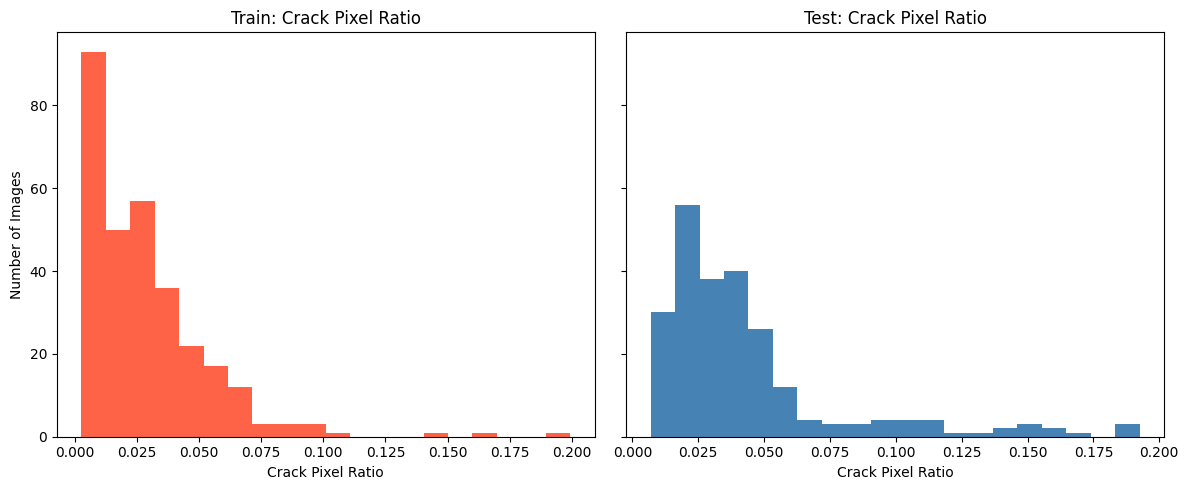

In [11]:
crack_pixels = []
background_pixels = []

for bundle in train_dataset:
    image = bundle['image']
    mask = bundle['mask']
    mask_np = np.array(mask)
    
    crack = np.sum(mask_np)
    total = mask_np.size
    crack_pixels.append(crack)
    background_pixels.append(total - crack)

# Plot ratio
ratios_train = [c / (c + b) for c, b in zip(crack_pixels, background_pixels)]

crack_pixels = []
background_pixels = []

for bundle in test_dataset:
    image = bundle['image']
    mask = bundle['mask']
    mask_np = np.array(mask)
    
    crack = np.sum(mask_np)
    total = mask_np.size
    crack_pixels.append(crack)
    background_pixels.append(total - crack)

# Plot ratio
ratios_test = [c / (c + b) for c, b in zip(crack_pixels, background_pixels)]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for training set
axes[0].hist(ratios_train, bins=20, color='tomato')
axes[0].set_title("Train: Crack Pixel Ratio")
axes[0].set_xlabel("Crack Pixel Ratio")
axes[0].set_ylabel("Number of Images")

# Plot for test set
axes[1].hist(ratios_test, bins=20, color='steelblue')
axes[1].set_title("Test: Crack Pixel Ratio")
axes[1].set_xlabel("Crack Pixel Ratio")

# Adjust layout and save the figure
plt.tight_layout()
# Do not save the plot
#plt.savefig("./generated_figures/crack_pixel_ratio_train_vs_test.png", dpi=300, bbox_inches='tight')
plt.show()

In the figure above the distribution of the crack pixel ratio is visible. It shows that most of the pixels are not cracks (as expected), so the dataset is unbalanced.

## Some examples for image and masks

C:\Users\Csaba\AppData\Local\Temp\ipykernel_4124\1108499977.py:137: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  image = np.transpose(np.array(bundle['image']), (1, 2, 0))
C:\Users\Csaba\AppData\Local\Temp\ipykernel_4124\1108499977.py:138: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))


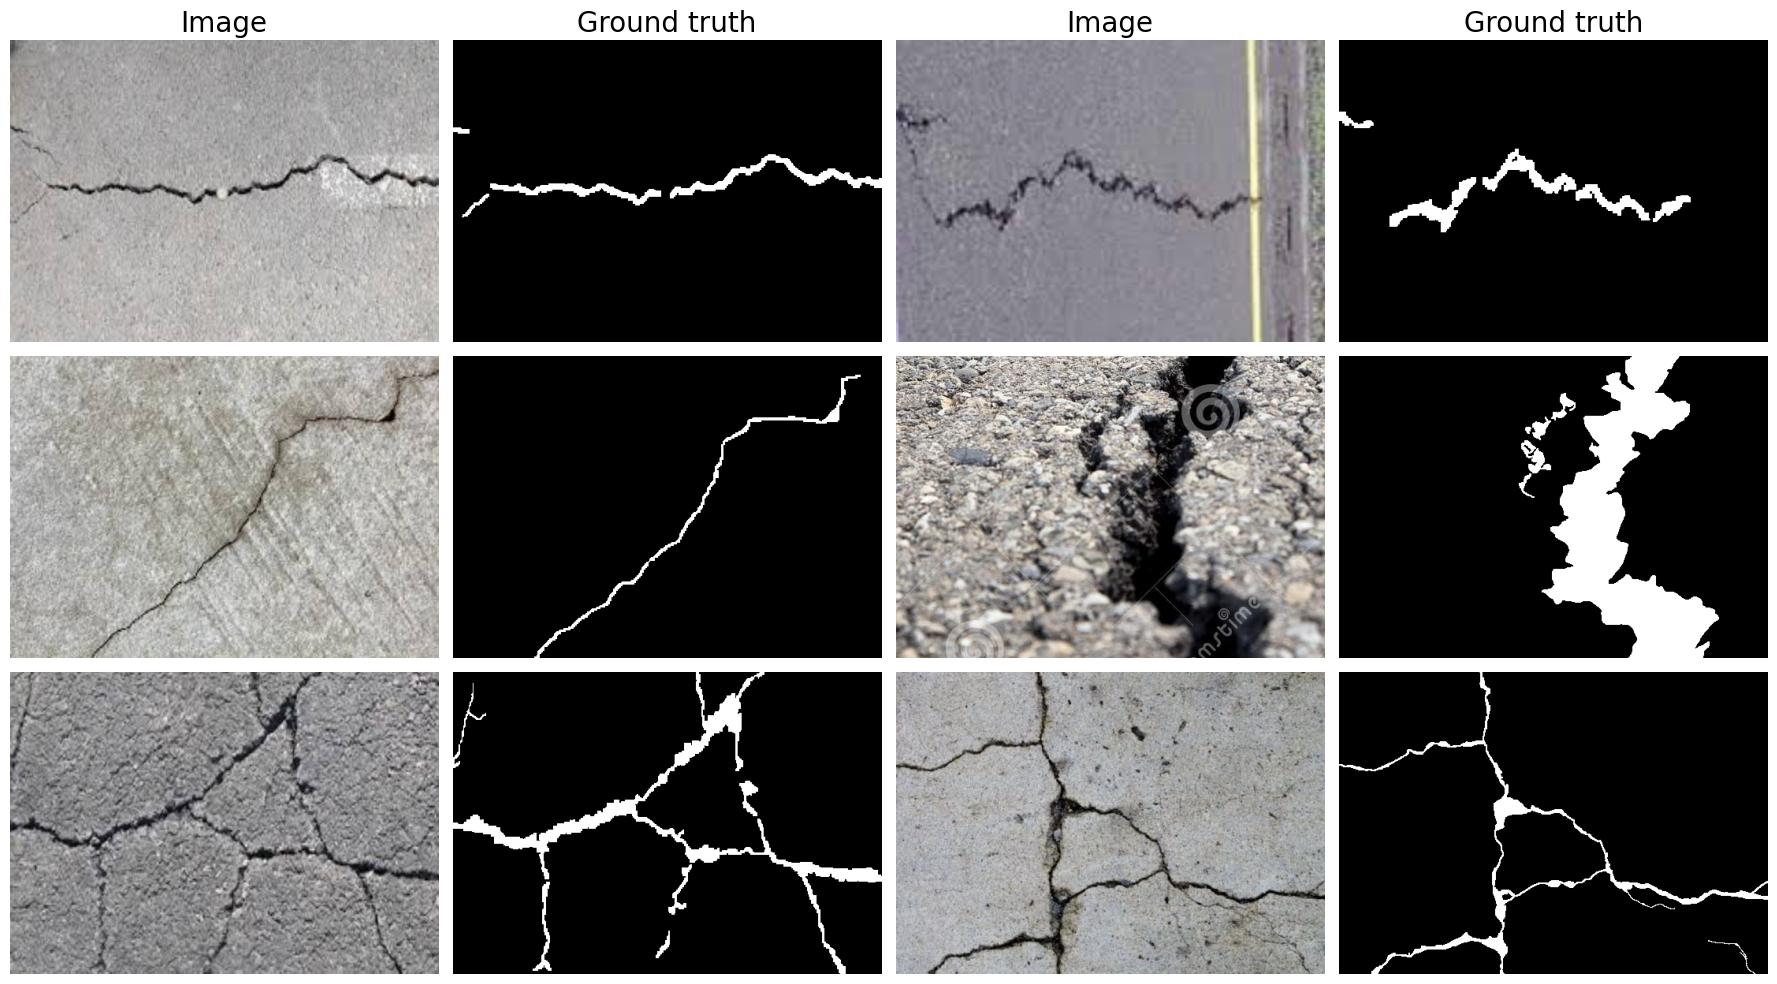

In [12]:
images_to_list = ['11111.jpg','11114.jpg', '11130.jpg', '11116-3.jpg', '11117.jpg', '11134-3.jpg', ]
pairs = [train_dataset.get_image_and_mask_by_name(name) for name in images_to_list]
#plot_image_mask_grid(pairs, columns=2, scale = 10, path = "./generated_figures/dataset_overview.png")
# Do not save the plot
plot_image_mask_grid(pairs, columns=2, scale = 10, path = None)

# Training
This part contains the actual trainings of the different experiments mentioned in the thesis. The results of the trainings was saved to different folders and later it will be loaded for evaluation. This approach was useful, as the trainings took a very long period of time and it is not effective to keep the mdoel and every results in the RAM.

## Init

In [13]:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [14]:
# CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()

Number of visible CUDA devices: 1


True

In [15]:
# Load data
data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

# With this setting only 3 images will be used in the training. It is useful for debuging the training loops, as with this small dataset it runs in a reasonable time.
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=3)
# The original code:
#train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2])

This gives us 240 train and 60 validation samples.


## UNET
This part contains the trainng of the original unet models.

The aim is to establish a baseline segmentation performance for crack detection without relying on pre-trained weights or transfer learning.
First, a learning rate adjustment was performed. The first experiment, unet-0, was run for the first 50 epochs with a 0.0001 learning rate, then for the last 188 epochs, it was run with a 0.0005 learning rate. After that, the next experiment (unet-1) involved the same architecture with a higher learning rate. In 166 epochs, the same performance as unet-0 was presented, so this learning rate was accepted. After that I made some hyperparameter tuning unet-1 ... unet-5, then with the best model (unet-4) some more experiments.

### unet-0

In [ ]:
lr = 1e-4
nr_of_epochs = 50
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_0'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


Train loss:  0.9485000967979431
Epoch  1 . finished.
Validation loss:  0.9754735231399536
Epoch 1/2 completed in 7.03 seconds
Train loss:  0.9252374172210693
Epoch  2 . finished.
Validation loss:  0.9753727316856384
save files
Epoch 2/2 completed in 6.19 seconds


In [ ]:
lr = 5e-4
nr_of_epochs = 188
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_0'
load_from_folder = 'unet_0'
model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_50.pth', weights_only=True))

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.904166579246521
Epoch  1 . finished.
Validation loss:  0.9748783707618713
Epoch 1/2 completed in 5.64 seconds
Train loss:  0.8542237281799316
Epoch  2 . finished.
Validation loss:  0.9743877053260803
save files
Epoch 2/2 completed in 6.23 seconds


### unet-1

In [ ]:
lr = 1e-3
nr_of_epochs = 166
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_1'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9231986403465271
Epoch  1 . finished.
Validation loss:  0.9743353128433228
Epoch 1/2 completed in 5.71 seconds
Train loss:  0.879824697971344
Epoch  2 . finished.
Validation loss:  0.9724188446998596
save files
Epoch 2/2 completed in 6.42 seconds


### unet-2

In [ ]:
lr = 1e-3
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_2'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64,
                depth=4)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9047496914863586
Epoch  1 . finished.
Validation loss:  0.9744871258735657
Epoch 1/2 completed in 4.89 seconds
Train loss:  0.8699721693992615
Epoch  2 . finished.
Validation loss:  0.9728094339370728
save files
Epoch 2/2 completed in 5.02 seconds


### unet-3

In [ ]:
lr = 1e-3
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_3'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64,
                depth=3)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9203421473503113
Epoch  1 . finished.
Validation loss:  0.9748178720474243
Epoch 1/2 completed in 4.20 seconds
Train loss:  0.8583798408508301
Epoch  2 . finished.
Validation loss:  0.9741941690444946
save files
Epoch 2/2 completed in 4.21 seconds


### unet-4

In [ ]:
lr = 1e-3
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_4'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 32,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9321581125259399
Epoch  1 . finished.
Validation loss:  0.9753533601760864
Epoch 1/2 completed in 1.16 seconds
Train loss:  0.8823704719543457
Epoch  2 . finished.
Validation loss:  0.9750266075134277
save files
Epoch 2/2 completed in 1.20 seconds


### unet-5

In [ ]:
lr = 1e-3
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_5'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 16,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9372068643569946
Epoch  1 . finished.
Validation loss:  0.9754926562309265
Epoch 1/2 completed in 0.64 seconds
Train loss:  0.9243936538696289
Epoch  2 . finished.
Validation loss:  0.9754396080970764
save files
Epoch 2/2 completed in 0.63 seconds


### unet-4-1
Try unet-4 with different learning rates.

In [ ]:
lr = 1e-2
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_4_lr1e-2'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 32,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9418637156486511
Epoch  1 . finished.
Validation loss:  0.972308874130249
Epoch 1/2 completed in 1.08 seconds
Train loss:  0.8880395889282227
Epoch  2 . finished.
Validation loss:  0.9998729825019836
save files
Epoch 2/2 completed in 1.19 seconds


### unet-4-2
Try unet-4 with different learning rates.

In [ ]:
lr = 2e-4
nr_of_epochs = 300
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_4_lr2e-4'
load_from_folder = 'unet_4'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 32,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_100.pth', weights_only=True))


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8643017411231995
Epoch  1 . finished.
Validation loss:  0.9748968482017517
Epoch 1/2 completed in 1.14 seconds
Train loss:  0.8637564778327942
Epoch  2 . finished.
Validation loss:  0.9748242497444153
save files
Epoch 2/2 completed in 1.19 seconds


### unet-4-3
unet-4, but without shuffle in the train set, for test the spikes disappear.

In [ ]:
# Create dataset without shuffling
# With this setting only 3 images will be used in the training. It is useful for debuging the training loops, as with this small dataset it runs in a reasonable time.
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=3, shuffle_train=False)
# The original code:
#train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], shuffle_train=False)

lr = 1e-3
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'unet_4_noshuflle'

model = UNet(img_channels = 3,
                mask_channels = 1,
                base_channel_size = 32,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

# Set back shuffling
# With this setting only 3 images will be used in the training. It is useful for debuging the training loops, as with this small dataset it runs in a reasonable time.
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=3, shuffle_train=True)
# The original code:
#train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], shuffle_train=True)

This gives us 240 train and 60 validation samples.
Train loss:  0.9125353693962097
Epoch  1 . finished.
Validation loss:  0.9751093983650208
Epoch 1/2 completed in 1.07 seconds
Train loss:  0.88649582862854
Epoch  2 . finished.
Validation loss:  0.9744910001754761
save files
Epoch 2/2 completed in 1.21 seconds
This gives us 240 train and 60 validation samples.


## U-NET with ResNet

The base architecture is the same as in the previous section, but the encoder part was changed
to a pre-trained ResNet model.
With this ResNet backbone it would be difficult to modify the depth and initial channel
numbers, as it is a pre-trained architecture. So, instead of tuning these hyperparameters,
experiments were made to test how the trainable layer setting affects the results. In
the first experiment (resnet-1) all the ResNet weights were frozen and only the decoder
weights were changed during the 200 epochs of training. After that, the deepest layer
(layer4, which is technically multiple convolution layers with the same output size) was
unfrozen, then the deepest and the second deepest (layer4, layer3), and so on. These
trainings were started from the result of the resnet-1 experiment and were run for an
additional 100 epochs. Learning rates were reduced to avoid catastrophic forgetting.

### resnet-1

In [ ]:
lr = 1e-3
nr_of_epochs = 200
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'resnet_1'

model = UNetResNet34(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}
model.freeze_encoder_layers()


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train loss:  0.938856840133667
Epoch  1 . finished.
Validation loss:  0.9752180576324463
save files
Epoch 1/2 completed in 1.23 seconds
Train loss:  0.9019472599029541
Epoch  2 . finished.
Validation loss:  0.9748410582542419
save files
Epoch 2/2 completed in 1.17 seconds


### resnet-1-1

In [ ]:
lr = 1e-4
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'resnet_1_1'
load_from_folder = 'resnet_1'
model = UNetResNet34(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_200.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers(['encoder4'])

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8789170980453491
Epoch  1 . finished.
Validation loss:  0.9747331738471985
save files
Epoch 1/2 completed in 1.21 seconds
Train loss:  0.8734865784645081
Epoch  2 . finished.
Validation loss:  0.9746044874191284
save files
Epoch 2/2 completed in 1.22 seconds


### resnet-1-2

In [ ]:
lr = 1e-5
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'resnet_1_2'
load_from_folder = 'resnet_1'
model = UNetResNet34(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_200.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers(['encoder3', 'encoder4'])

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8811808824539185
Epoch  1 . finished.
Validation loss:  0.974751889705658
save files
Epoch 1/2 completed in 1.37 seconds
Train loss:  0.8726779222488403
Epoch  2 . finished.
Validation loss:  0.9746297597885132
save files
Epoch 2/2 completed in 1.42 seconds


### resnet-1-3

In [ ]:
lr = 1e-5
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'resnet_1_3'
load_from_folder = 'resnet_1'
model = UNetResNet34(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_200.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers(['encoder2', 'encoder3', 'encoder4'])

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8822144865989685
Epoch  1 . finished.
Validation loss:  0.9747522473335266
save files
Epoch 1/2 completed in 1.34 seconds
Train loss:  0.8761863112449646
Epoch  2 . finished.
Validation loss:  0.9746338129043579
save files
Epoch 2/2 completed in 1.30 seconds


### resnet-1-4

In [ ]:
lr = 1e-5
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'resnet_1_4'
load_from_folder = 'resnet_1'
model = UNetResNet34(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_200.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers()

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8734967708587646
Epoch  1 . finished.
Validation loss:  0.9747451543807983
save files
Epoch 1/2 completed in 1.38 seconds
Train loss:  0.8815194964408875
Epoch  2 . finished.
Validation loss:  0.9746288657188416
save files
Epoch 2/2 completed in 1.38 seconds


## U-Net with SWIN
In this Section some experiments will be presented with the U-Net model and a SWIN
transformer backbone. In the first experiment (swin-1) all SWIN weights were frozen and only the decoder weights
were changed during the 220 epochs of training. After that, the ’deepest’ layer (layer4)
was unfrozen, then the deepest and the second deepest (layer4, layer3), but no more experiments were performed, because of the very long training time. These trainings
were started from the result of the swin-1 experiment and were run for an additional 100
epochs. Learning rates were reduced to avoid catastrophic forgetting.

### swin-1

In [ ]:
lr = 1e-3
nr_of_epochs = 220
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'swin_1'

model = UNetSwin(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}
model.freeze_encoder_layers()


train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.9289480447769165
Epoch  1 . finished.
Validation loss:  0.9749383926391602
save files
Epoch 1/2 completed in 7.28 seconds
Train loss:  0.8853143453598022
Epoch  2 . finished.
Validation loss:  0.9739512801170349
save files
Epoch 2/2 completed in 7.27 seconds


### swin-1-1

In [ ]:
lr = 1e-4
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'swin_1_1'
load_from_folder = 'swin_1'
model = UNetSwin(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_220.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers(['layers_3'])

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8587464094161987
Epoch  1 . finished.
Validation loss:  0.9736649990081787
save files
Epoch 1/2 completed in 5.28 seconds
Train loss:  0.8562119007110596
Epoch  2 . finished.
Validation loss:  0.9733064770698547
save files
Epoch 2/2 completed in 8.19 seconds


### swin-1-2

In [ ]:
lr = 1e-5
nr_of_epochs = 100
#nr_of_epochs = 2
nr_of_epochs_save = 10
model_name = 'swin_1_2'
load_from_folder = 'swin_1'
model = UNetSwin(   img_channels = 3,
                mask_channels = 1)  

loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = lr)

# Load logs from previous training (optional)
dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models2/'+load_from_folder+'/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models2/'+load_from_folder+'/train_loss.npy'))
val_loss = list(np.load('../saved_models2/'+load_from_folder+'/val_loss.npy'))
epoch_durations = list(np.load('../saved_models2/'+load_from_folder+'/epoch_durations.npy'))
best_model_wts = {}

# Load pretrained weights
model.load_state_dict(torch.load('../saved_models2/'+load_from_folder+'/model_state_epoch_220.pth', weights_only=True))
model.freeze_encoder_layers()
model.unfreeze_encoder_layers(['layers_2', 'layers_3'])

train(model, loss, optimizer, train_dl, val_dl,
        num_epochs = nr_of_epochs,
        accum_scale = 4,
        dice_idcs = dice_idcs,
        epoch_dice_idcs = epoch_dice_idcs,
        val_dice_idcs = val_dice_idcs,
        best_model_wts = best_model_wts,
        train_loss=train_loss,
        val_loss=val_loss,
        epoch_durations=epoch_durations,
        save_path='../saved_models2/'+model_name+'/',
        n_epoch_save=nr_of_epochs_save)

Train loss:  0.8611980676651001
Epoch  1 . finished.
Validation loss:  0.9737808704376221
save files
Epoch 1/2 completed in 10.43 seconds
Train loss:  0.8575254678726196
Epoch  2 . finished.
Validation loss:  0.973554253578186
save files
Epoch 2/2 completed in 11.30 seconds


# Evaluation
This part contains the evaluation of the models. In every cases the training losses and the Dice index distributions on the test set were plotted. The distribution figures
help to identify whether a model with a high average Dice score may still suffer from poor
generalization. For instance, a model that performs consistently well across all images
can be preferable to one that excels on some but performs poorly on others, even if their
average scores are similar.
Also two tables included in every cases, one is summarizing the parameters used, the other one contains the average test score and training time.

## U-Net models

In [41]:
# LOAD THE DATA
data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=10)
# use validation to avoid augmentation
_, test_dl, _, test_dataset = load_data_deep_crack(test_image_dir, test_mask_dir, [0, 1])

This gives us 240 train and 60 validation samples.
This gives us 0 train and 237 validation samples.


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 0 is 0. This might result in an empty dataset.
  warnings.warn(


### Evaluate the base unet models: 

In [10]:
import numpy as np
import torch
from tqdm import tqdm

# List of model subdirectories
path_list = ['unet_0', 'unet_1', 'unet_2', 'unet_3', 'unet_4', 'unet_5']
learning_rates = [ "1e-4 - 5e-4", "1e-3","1e-3","1e-3","1e-3","1e-3"]
started_from_models = [ "none", "none", "none", "none", "none","none"]
names = [ "unet-0", "unet-1", "unet-2", "unet-3", "unet-4","unet-5"]
epochs = [238, 166, 100,100,100,100]
#path_list = ['unet_6']

# Corresponding model parameter sets
param_sets = [
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 64, 'depth': 5},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 64, 'depth': 5},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 64, 'depth': 4},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 64, 'depth': 3},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 32, 'depth': 5},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 16, 'depth': 5},
]

# A list to store all evaluation results for later processing
results = []

# Iterate through all models and evaluate
for idx, (param, path) in enumerate(zip(param_sets, path_list), 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")

    # Initialize model and loss function
    model = UNet(**param)
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))

    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/best_model_wts.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "params": param,
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "number_of_params": count_trainable_parameters(model),
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }

    # Append results
    results.append(result_entry)

print("\nAll models processed.")



Processing model: 1/6 (unet_0)


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(



Processing model: 2/6 (unet_1)

Processing model: 3/6 (unet_2)

Processing model: 4/6 (unet_3)

Processing model: 5/6 (unet_4)

Processing model: 6/6 (unet_5)

All models processed.


Plot training losses:

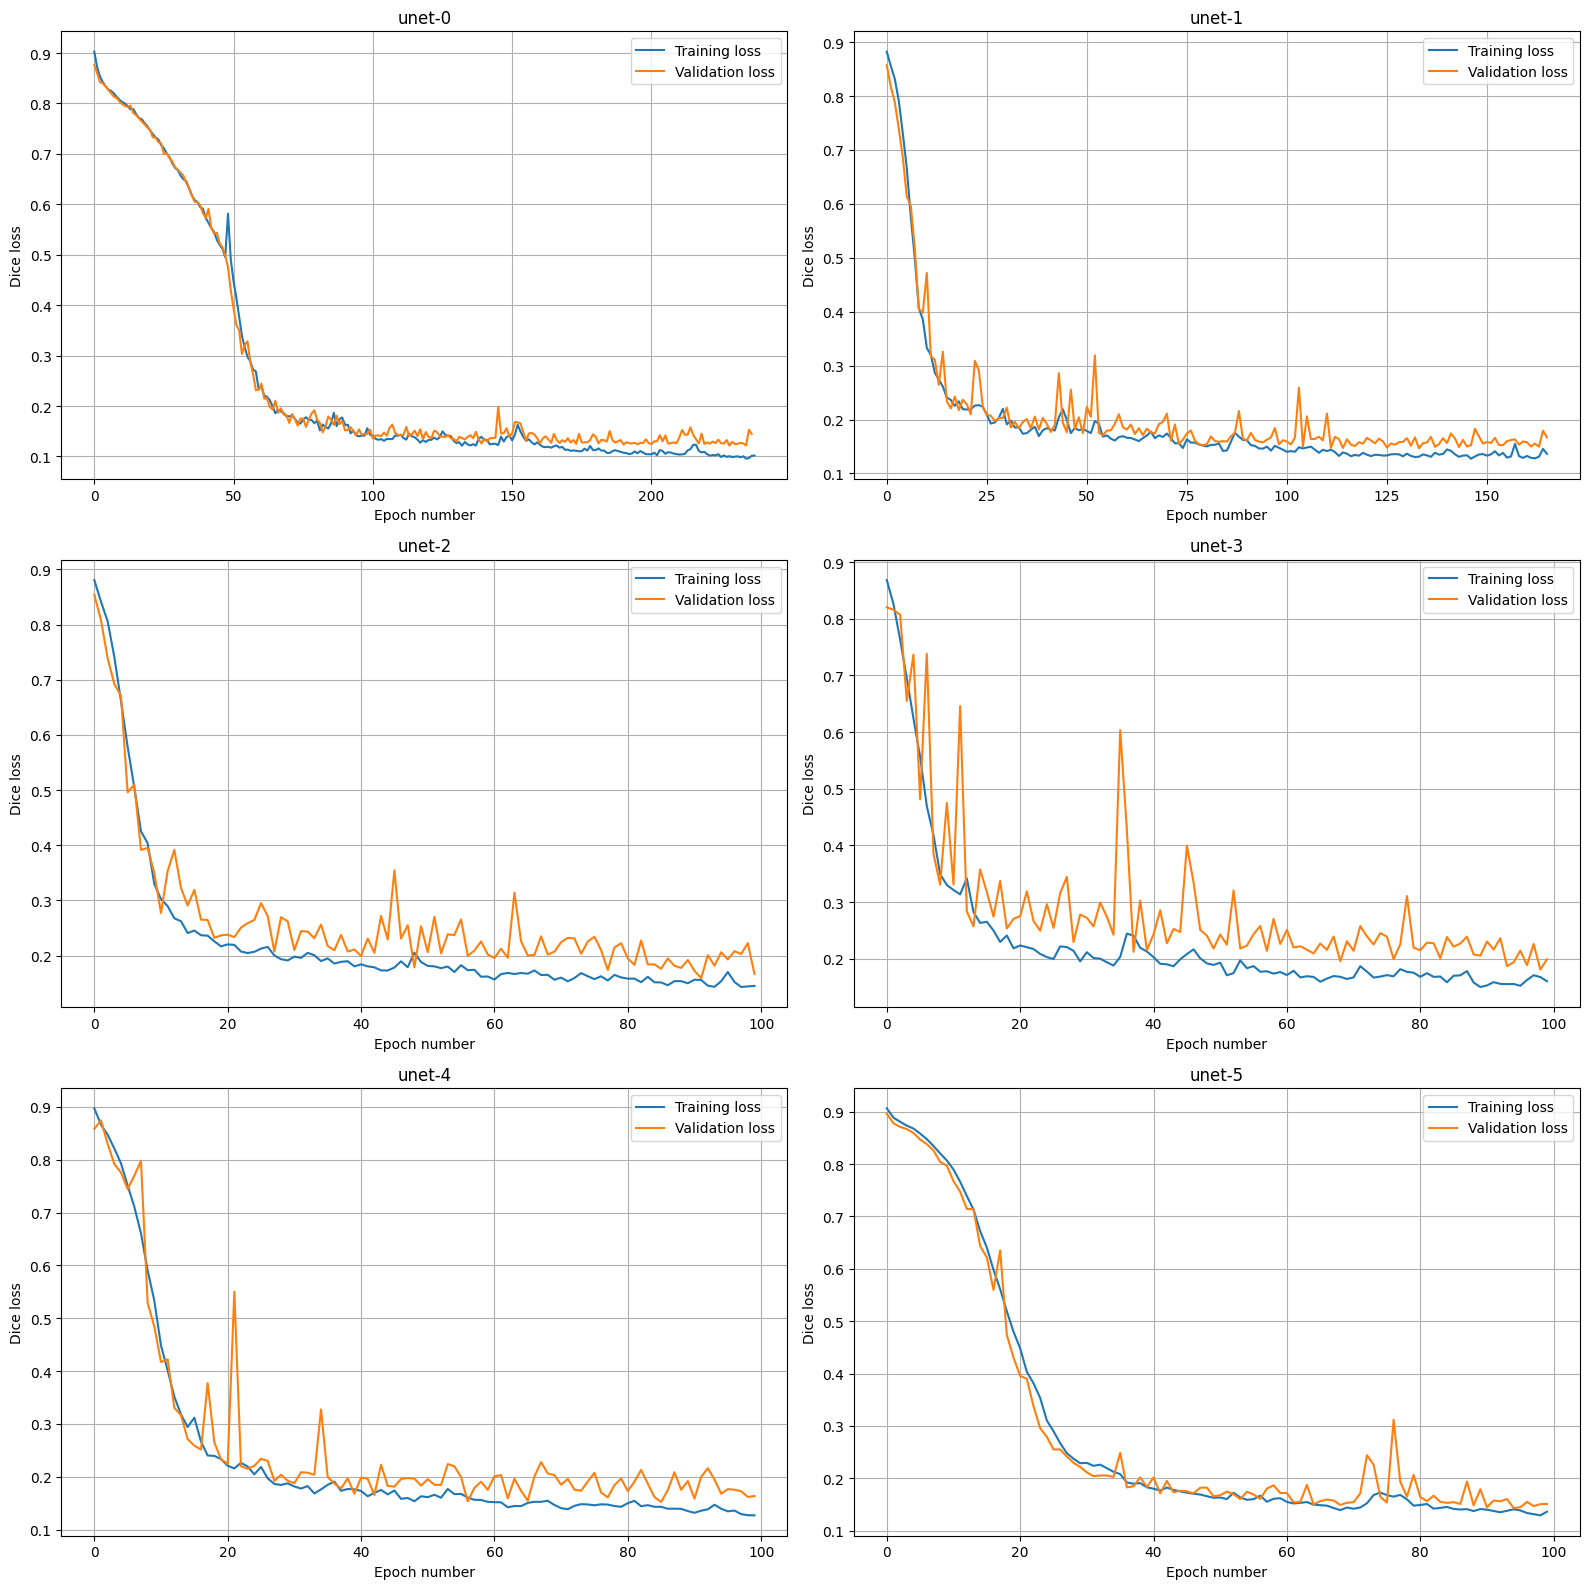

In [11]:
# Set up the subplot grid
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
axs = axs.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Plot each model's loss curves
for i, res in enumerate(results):
    ax = axs[i]
    
    # Plot training and validation loss
    ax.plot(res["train_loss"], label='Training loss')
    ax.plot(res["val_loss"], label='Validation loss')
    
    ax.set_title(res["name"])
    ax.set_xlabel("Epoch number")
    ax.set_ylabel("Dice loss")
    ax.grid(True)
    ax.legend()


plt.tight_layout()
#plt.savefig("../outputs/generated_figures/unet_losses.png", dpi=300, bbox_inches='tight')
#plt.show()

Plot distributions:

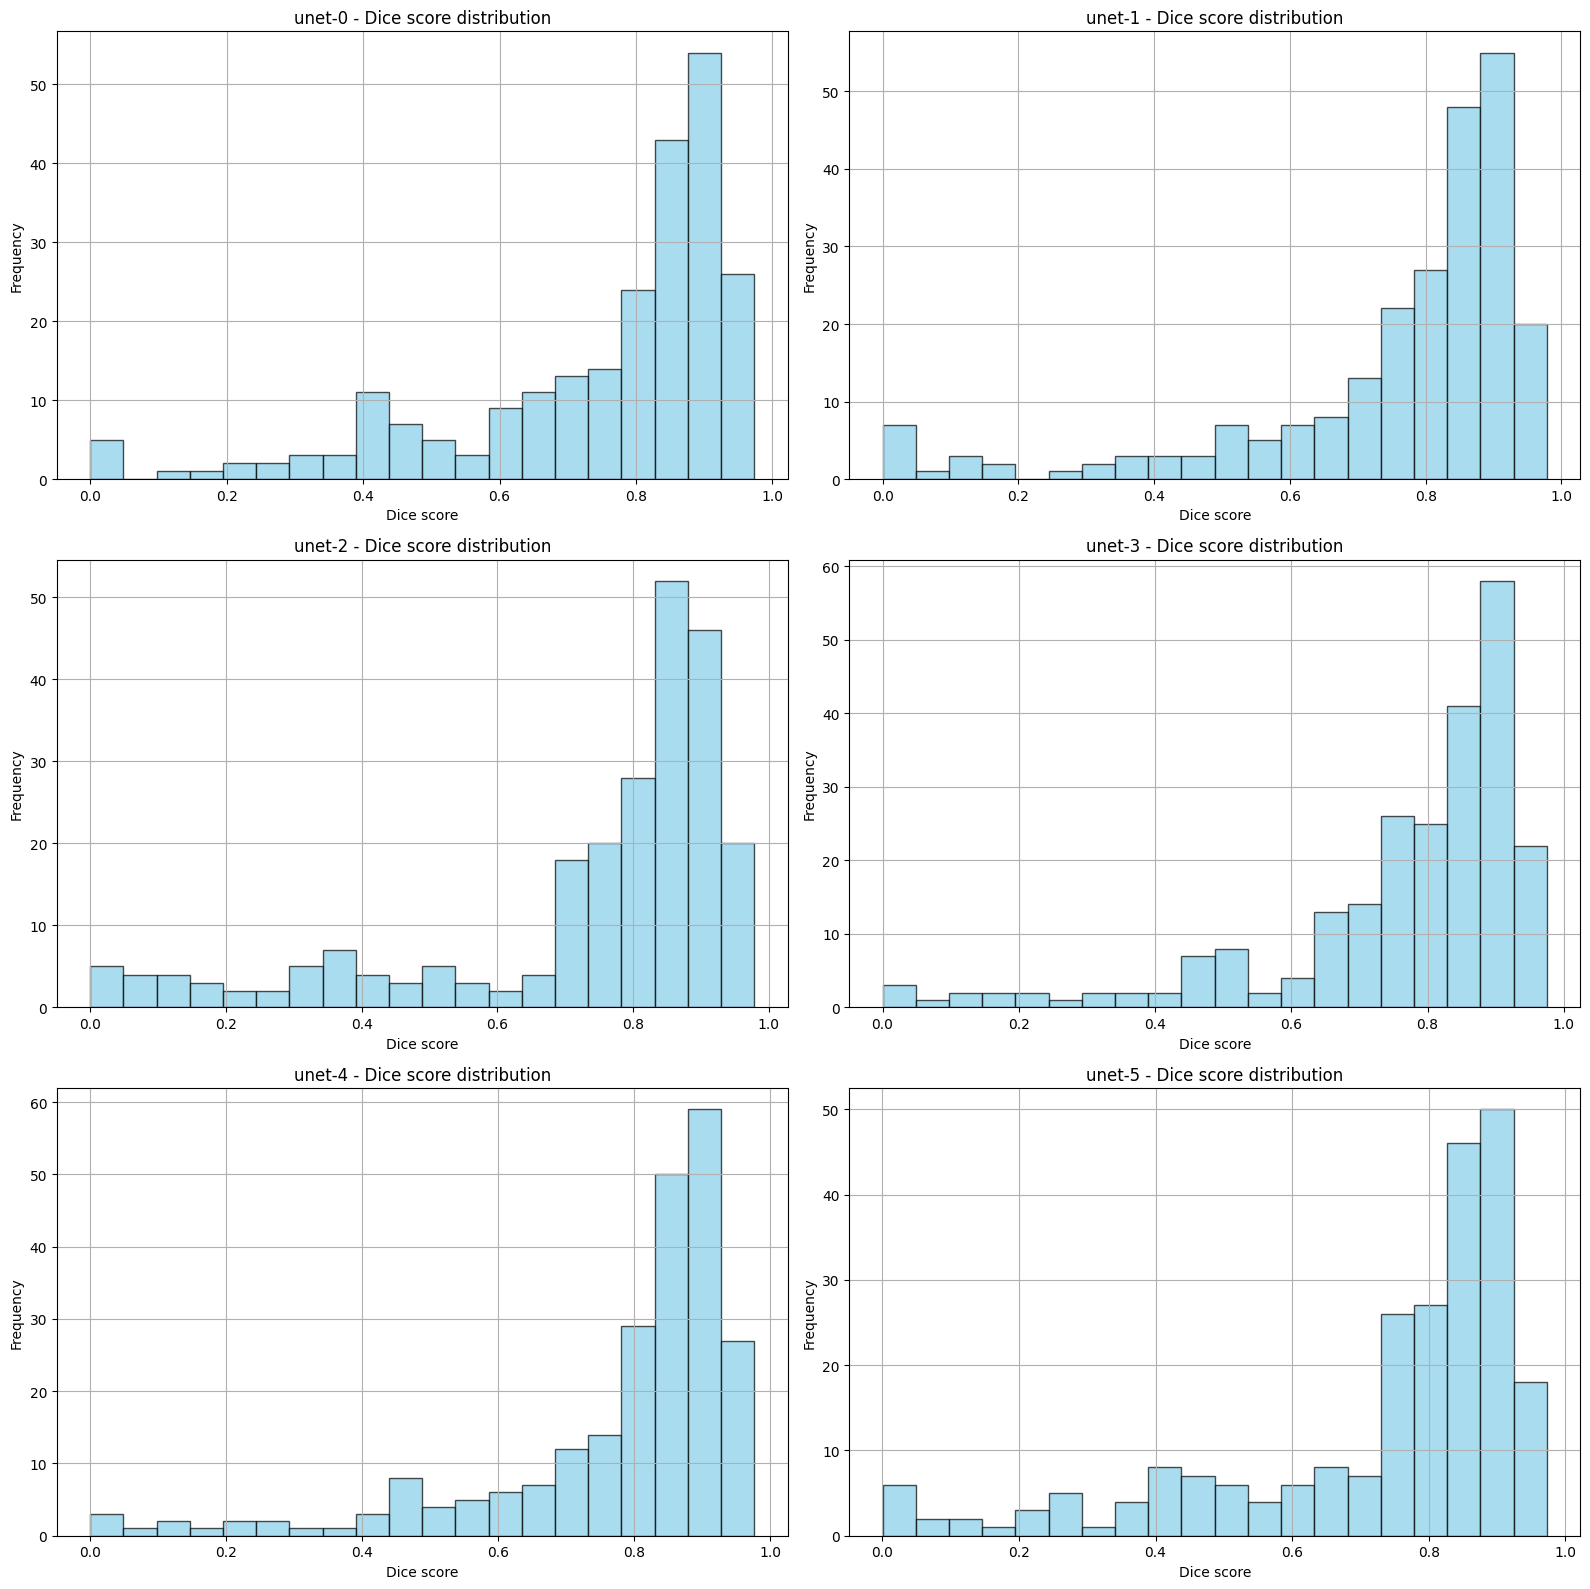

In [12]:
# Set up the 2x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
axs = axs.flatten()

# Plot histograms for the first 4 models
for i in range(6):
    res = results[i]
    ax = axs[i]
    
    ax.hist(res['test_dice_scores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{res['name']} - Dice score distribution")
    ax.set_xlabel("Dice score")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
#plt.savefig("../outputs/generated_figures/unet_dice_dist.png", dpi=300, bbox_inches='tight')
#plt.show()

Create parameter table:

In [13]:
# Build a list of dictionaries with desired summary information
summary_data = []
#learning_rates = [ "0.0001-0.0005", "0.001", "0.001", "0.001", "0.001","0.001"]
for res in results:
    summary_data.append({
        "Name": res["name"],
        "Learn. rate": res["lr"],  # Adjust if you stored learning rate elsewhere
        "Depth": res["params"].get("depth"),
        "Channel nr.": res["params"].get("base_channel_size"),
        "Epochs": res["epoch_nr"],
        "Million parameters": to_4_significant_digits(res["number_of_params"]/1000000),
        "Started from": res["started_from"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/unet_summary.tex')
# Display the DataFrame
print(summary_df)

     Name  Learn. rate  Depth  Channel nr.  Epochs Million parameters  \
0  unet-0  1e-4 - 5e-4      5           64     238              31.04   
1  unet-1         1e-3      5           64     166              31.04   
2  unet-2         1e-3      4           64     100              7.703   
3  unet-3         1e-3      3           64     100              1.865   
4  unet-4         1e-3      5           32     100              7.766   
5  unet-5         1e-3      5           16     100              1.944   

  Started from  
0         none  
1         none  
2         none  
3         none  
4         none  
5         none  


Create results table:

In [14]:
# Prepare summary data
summary_data = []

for res in results:
    # Compute training time in hours
    total_seconds = sum(res.get("epoch_durations", []))
    training_time_hours = round(total_seconds / 3600, 3)

    # Build the row dictionary
    summary_data.append({
        "Name": res["name"],
        "Average Dice index": round(res["test_avg_dice"], 3),
        "Training time [hours]": training_time_hours
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/unet_results.tex')
# Display the result
print(summary_df)

     Name  Average Dice index  Training time [hours]
0  unet-0               0.747                  0.000
1  unet-1               0.757                 33.249
2  unet-2               0.732                 12.858
3  unet-3               0.763                  9.146
4  unet-4               0.780                  2.213
5  unet-5               0.729                  0.951


### Evaluate the results of unet-4-1 and unet-4-2:

In [15]:
# List of model subdirectories
path_list = ['unet_4_lr1e-2', 'unet_4_lr2e-4']
learning_rates = [ "1e-2", "2e-4"]
started_from_models = [ "none", "unet-4"]
names = [ "unet-4-1", "unet-4-2"]
epochs = [100, 300]
#path_list = ['unet_6']

# Corresponding model parameter sets
param_sets = [
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 32, 'depth': 5},
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 32, 'depth': 5}
]

# A list to store all evaluation results for later processing
results_unet4 = []

# Iterate through all models and evaluate
for idx, (param, path) in enumerate(zip(param_sets, path_list), 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")

    # Initialize model and loss function
    model = UNet(**param)
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))

    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/best_model_wts.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "params": param,
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "number_of_params": count_trainable_parameters(model),
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }

    # Append results
    results_unet4.append(result_entry)

print("\nAll models processed.")


Processing model: 1/2 (unet_4_lr1e-2)

Processing model: 2/2 (unet_4_lr2e-4)

All models processed.


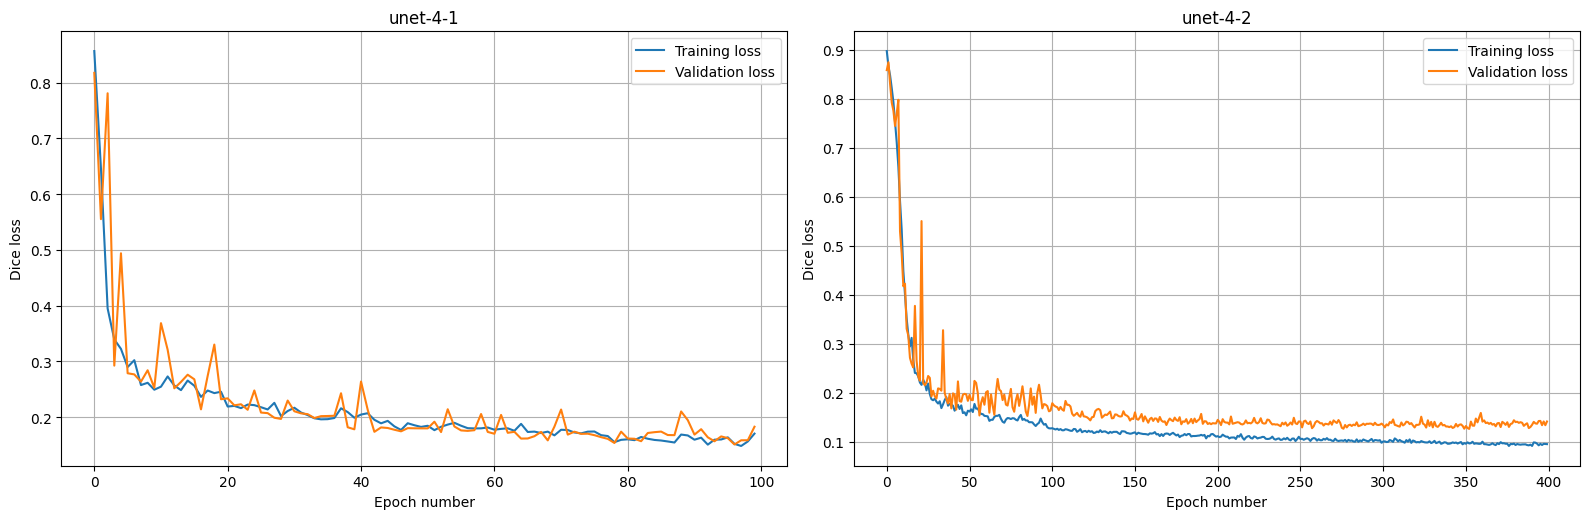

In [16]:
# Set up the subplot grid
fig, axs = plt.subplots(1, 2, figsize=(16, 5.3))
axs = axs.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Plot each model's loss curves
for i, res in enumerate(results_unet4):
    ax = axs[i]
    
    # Plot training and validation loss
    ax.plot(res["train_loss"], label='Training loss')
    ax.plot(res["val_loss"], label='Validation loss')
    
    ax.set_title(res["name"])
    ax.set_xlabel("Epoch number")
    ax.set_ylabel("Dice loss")
    ax.grid(True)
    ax.legend()


plt.tight_layout()
#plt.savefig("../outputs/generated_figures/unet4_losses.png", dpi=300, bbox_inches='tight')
plt.show()

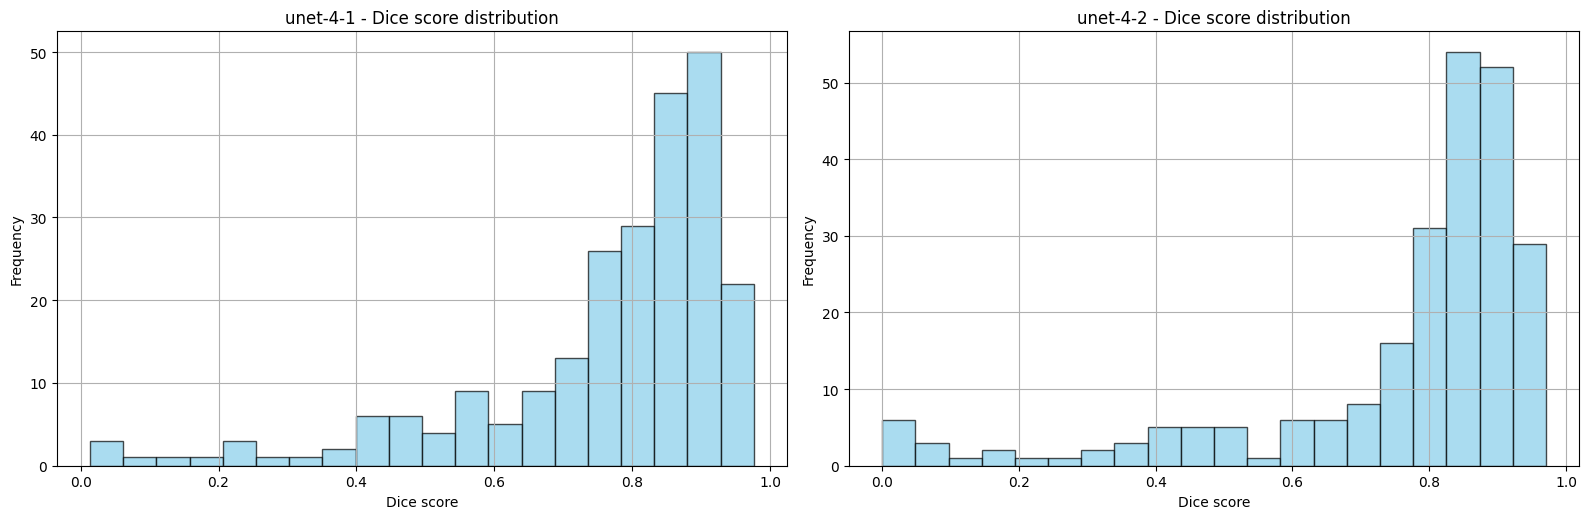

In [17]:
import matplotlib.pyplot as plt

# Set up the 2x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(16, 5.3))
axs = axs.flatten()

# Plot histograms for the first 4 models
for i in range(2):
    res = results_unet4[i]
    ax = axs[i]
    
    ax.hist(res['test_dice_scores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{res['name']} - Dice score distribution")
    ax.set_xlabel("Dice score")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
#plt.savefig("../outputs/generated_figures/unet4_dice_dist.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Build a list of dictionaries with desired summary information
summary_data = []

for res in results_unet4:
    summary_data.append({
        "Name": res["name"],
        "Lear. rate": res["lr"],  # Adjust if you stored learning rate elsewhere
        "Depth": res["params"].get("depth"),
        "Channel nr.": res["params"].get("base_channel_size"),
        "Epochs": res["epoch_nr"],
        "Million parameters": to_4_significant_digits(res["number_of_params"]/1000000),
        "Started from": res["started_from"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/unet4_summary.tex')
# Display the DataFrame
print(summary_df)

       Name Lear. rate  Depth  Channel nr.  Epochs Million parameters  \
0  unet-4-1       1e-2      5           32     100              7.766   
1  unet-4-2       2e-4      5           32     300              7.766   

  Started from  
0         none  
1       unet-4  


In [19]:
# Prepare summary data
summary_data = []

for res in results_unet4:
    # Compute training time in hours
    total_seconds = sum(res.get("epoch_durations", []))
    training_time_hours = round(total_seconds / 3600, 3)

    # Build the row dictionary
    summary_data.append({
        "Name": res["name"],
        "Average Dice index": round(res["test_avg_dice"], 3),
        "Training time [hours]": training_time_hours
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/unet4_results.tex')
# Display the result
print(summary_df)

       Name  Average Dice index  Training time [hours]
0  unet-4-1               0.765                  1.783
1  unet-4-2               0.762                  7.590


### Evaluate the unet model with no shuffle:

In [20]:
# List of model subdirectories
path_list = ['unet_4_noshuflle']
learning_rates = [ "1e-3"]
started_from_models = [ "none"]
names = [ "unet-4-3"]
epochs = [100]
#path_list = ['unet_6']

# Corresponding model parameter sets
param_sets = [
    {'img_channels': 3, 'mask_channels': 1, 'base_channel_size': 32, 'depth': 5}
]

# A list to store all evaluation results for later processing
results_noshuffle = []

# Iterate through all models and evaluate
for idx, (param, path) in enumerate(zip(param_sets, path_list), 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")

    # Initialize model and loss function
    model = UNet(**param)
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))

    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/best_model_wts.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "params": param,
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "number_of_params": count_trainable_parameters(model),
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }

    # Append results
    results_noshuffle.append(result_entry)
print("\nAll models processed.")



Processing model: 1/1 (unet_4_noshuflle)

All models processed.


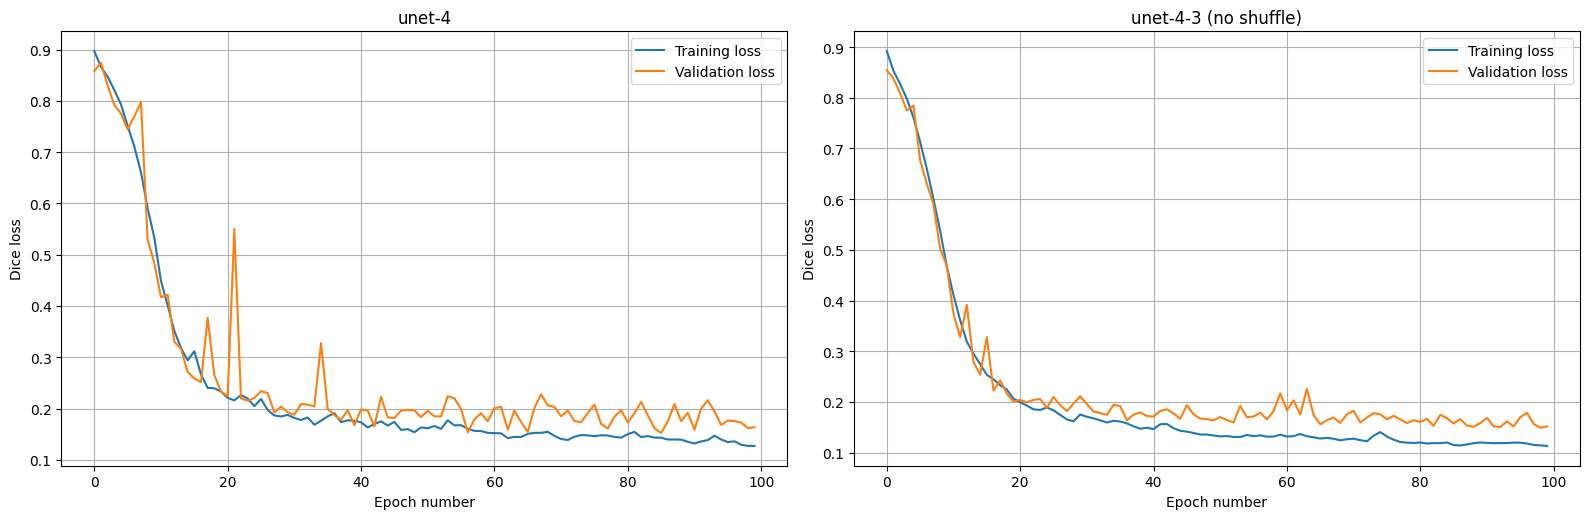

In [ ]:
# Set up the subplot grid
fig, axs = plt.subplots(1, 2, figsize=(16, 5.3))
axs = axs.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Plot each model's loss curves
ax = axs[0]
    
    # Plot training and validation loss
ax.plot(results[4]["train_loss"], label='Training loss')
ax.plot(results[4]["val_loss"], label='Validation loss')
    
ax.set_title(results[4]["name"])
ax.set_xlabel("Epoch number")
ax.set_ylabel("Dice loss")
ax.grid(True)
ax.legend()

ax = axs[1]
    
# Plot training and validation loss
ax.plot(results_noshuffle[0]["train_loss"], label='Training loss')
ax.plot(results_noshuffle[0]["val_loss"], label='Validation loss')
    
ax.set_title(results_noshuffle[0]["name"] + " (no shuffle)")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Dice loss")
ax.grid(True)
ax.legend()




plt.tight_layout()
#plt.savefig("../outputs/generated_figures/unet4_noshuffle_losses.png", dpi=300, bbox_inches='tight')
plt.show()

## U-Net with ResNet models

In [48]:
import numpy as np
import torch
from tqdm import tqdm

# List of model subdirectories
path_list = ['resnet_1', 'resnet_unfreeze2_1', 'resnet_unfreeze2_2', 'resnet_unfreeze2_3', 'resnet_unfreeze2_4']
#path_list = ['resnet_1', 'resnet_unfreeze_again_1', 'resnet_unfreeze_again_2', 'resnet_unfreeze_again_3', 'resnet_unfreeze_again_4']
learning_rates = [ "1e-3", "1e-4", "1e-5", "1e-5", "1e-5"]
started_from_models = [ "none", "resnet-1", "resnet-1", "resnet-1", "resnet-1"]
names = [ "resnet-1", "resnet-1-1", "resnet-1-2", "resnet-1-3", "resnet-1-4"]
weights = [ "best_model_wts", "model_state_epoch_50", "model_state_epoch_50","model_state_epoch_50","model_state_epoch_50"]
epochs = [200, 100, 100,100,100]
#path_list = ['unet_6']

# Corresponding model parameter sets
experiments = [
    (['non_existing_layer'], "none"),                       # B: Unfreeze layer4
    (['encoder4'], "layer4"),                       # B: Unfreeze layer4
    (['encoder3', 'encoder4'], "layer4, layer3"),           # C: Unfreeze layers 3,4
    (['encoder2', 'encoder3', 'encoder4'], "layer4, layer3, layer2"),# D: Unfreeze layers 2,3,4
    (None, "layer4, layer3, layer2, layer1"),                                # E: Unfreeze all
]
# A list to store all evaluation results for later processing
results = []

# Iterate through all models and evaluate
for idx, (path) in enumerate(path_list, 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")
    layers = experiments[idx-1][0]
    layers_text = experiments[idx-1][1]
    # Initialize model and loss function
    model = UNetResNet34(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64)  
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))
    model.freeze_encoder_layers()
    model.unfreeze_encoder_layers(layers)
    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/{weights[idx-1]}.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "layers_unfreze": layers_text,
        "number_of_params": count_trainable_parameters(model),        
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }

    # Append results
    results.append(result_entry)

print("\nAll models processed.")



Processing model: 1/5 (resnet_1)


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Processing model: 2/5 (resnet_unfreeze2_1)

Processing model: 3/5 (resnet_unfreeze2_2)

Processing model: 4/5 (resnet_unfreeze2_3)

Processing model: 5/5 (resnet_unfreeze2_4)

All models processed.


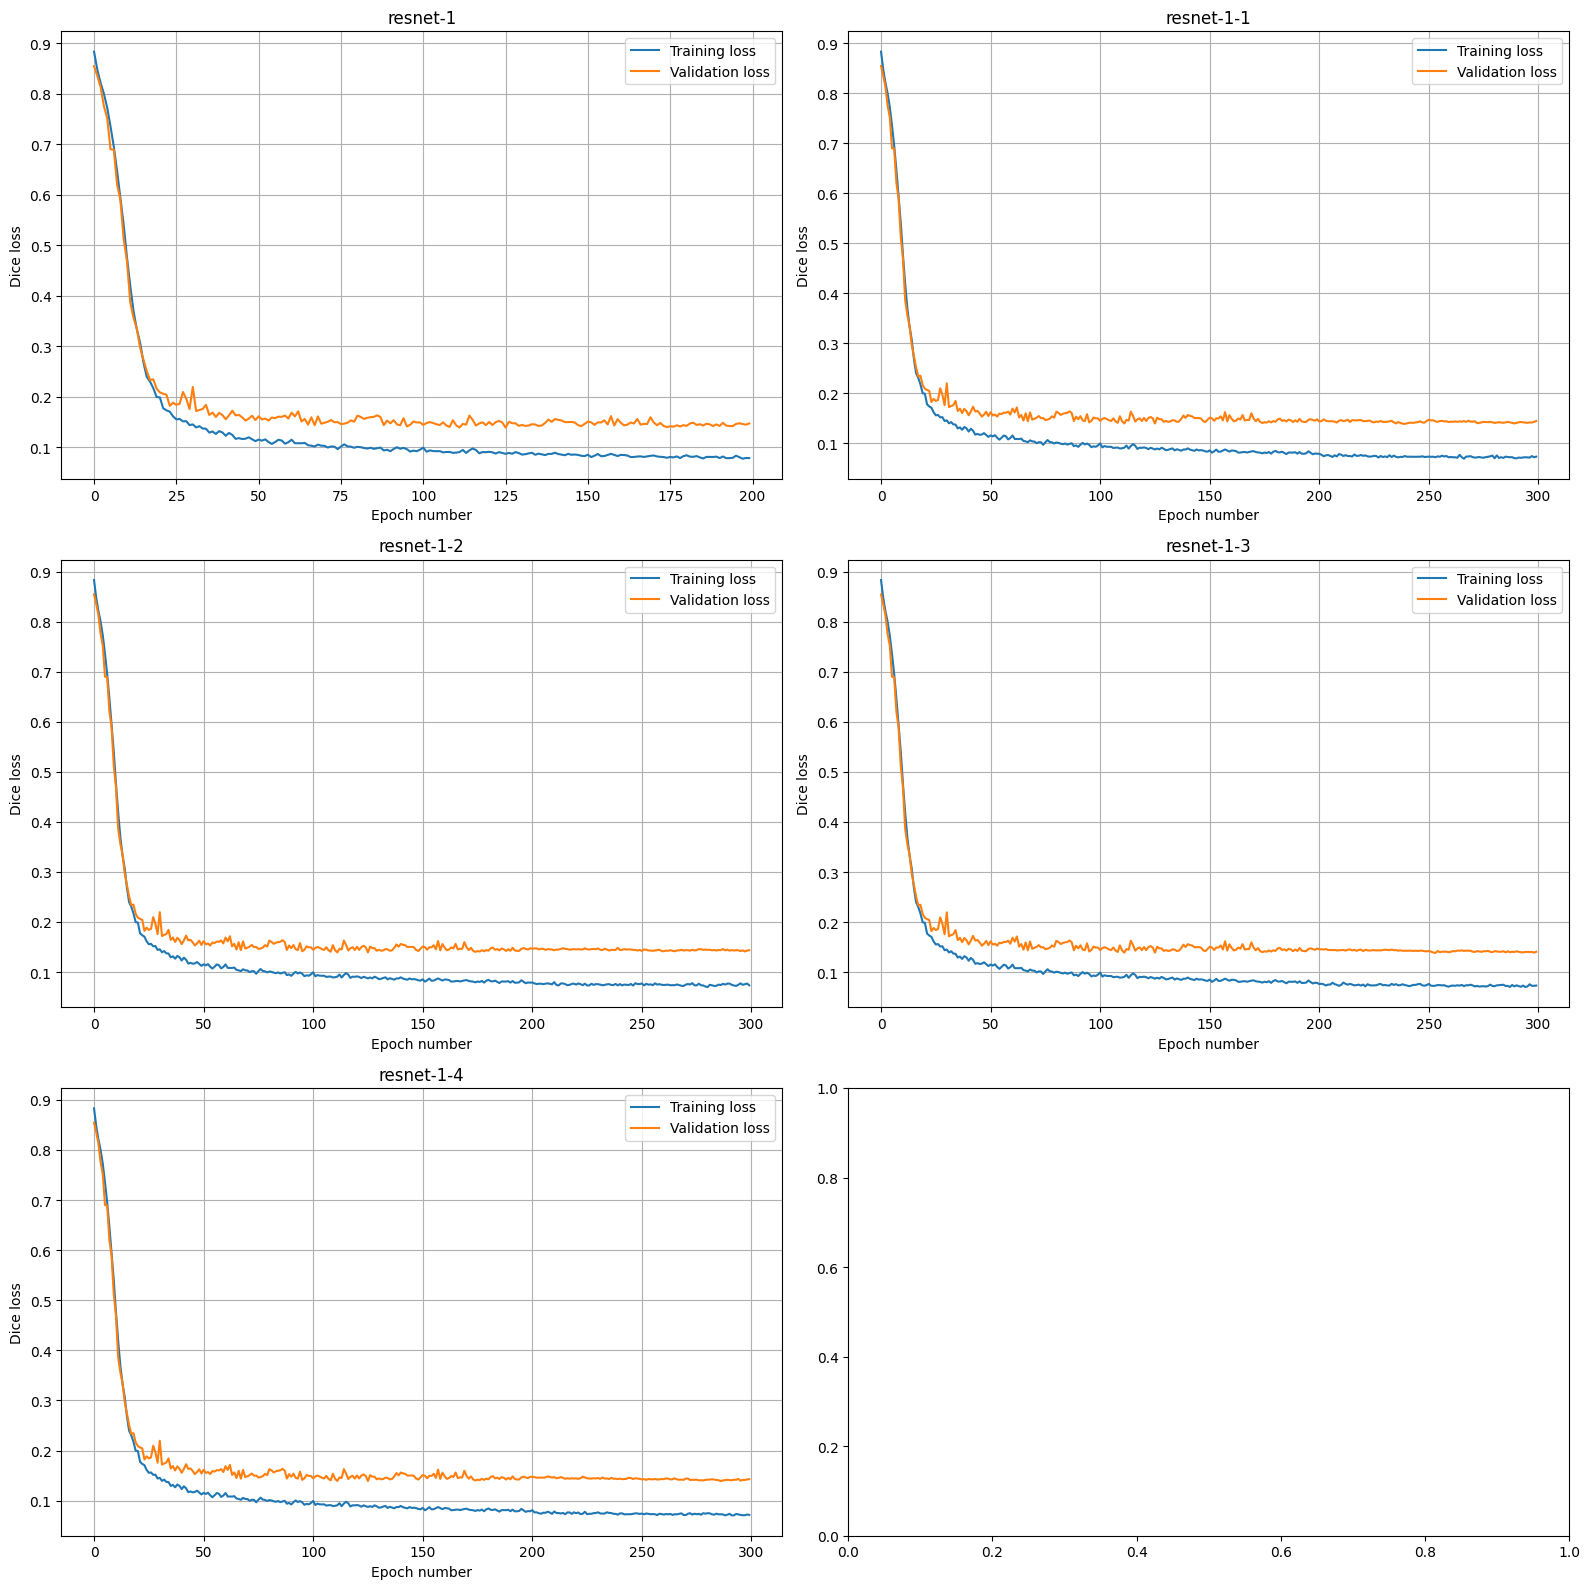

In [49]:
# Set up the subplot grid
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
axs = axs.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Plot each model's loss curves
for i, res in enumerate(results):
    ax = axs[i]
    
    # Plot training and validation loss
    ax.plot(res["train_loss"][:], label='Training loss')
    ax.plot(res["val_loss"][:], label='Validation loss')
    
    ax.set_title(res["name"])
    ax.set_xlabel("Epoch number")
    ax.set_ylabel("Dice loss")
    ax.grid(True)
    ax.legend()


plt.tight_layout()
#plt.savefig("../outputs/generated_figures/resnet_losses.png", dpi=300, bbox_inches='tight')
plt.show()

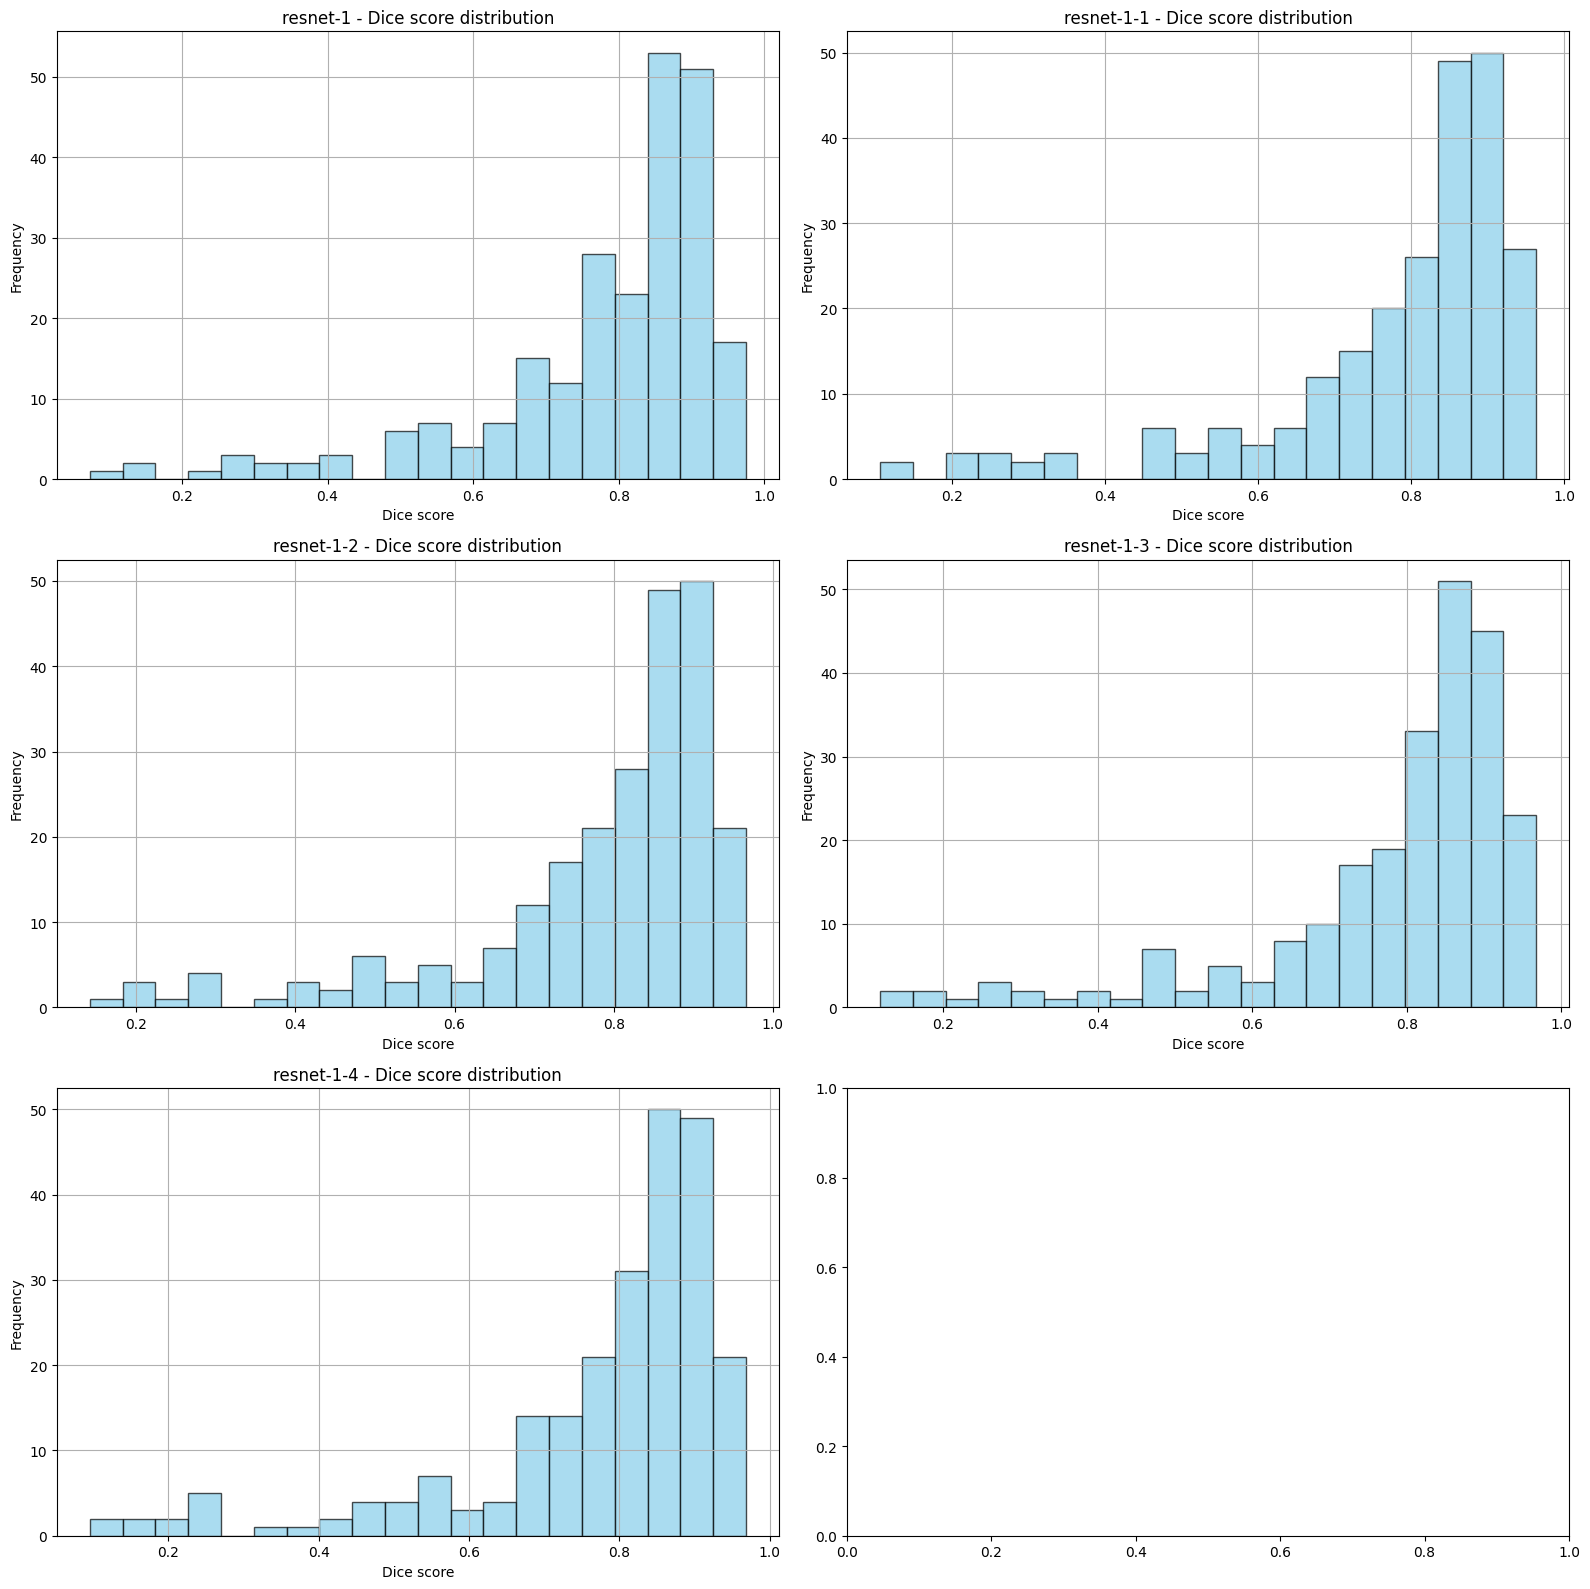

In [50]:
import matplotlib.pyplot as plt

# Set up the 2x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
axs = axs.flatten()

# Plot histograms for the first 4 models
for i in range(5):
    res = results[i]
    ax = axs[i]
    
    ax.hist(res['test_dice_scores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{res['name']} - Dice score distribution")
    ax.set_xlabel("Dice score")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
#plt.savefig("../outputs/generated_figures/resnet_dice_dist.png", dpi=300, bbox_inches='tight')
plt.show()


In [51]:
# Build a list of dictionaries with desired summary information
summary_data = []

for res in results:
    summary_data.append({
        "Name": res["name"],
        "Learning rate": res["lr"],  # Adjust if you stored learning rate elsewhere
        "Epochs": res["epoch_nr"],
        "Unfreezed layers": res["layers_unfreze"],
        "Million parameters": to_4_significant_digits(res["number_of_params"]/1000000),
        "Started from": res["started_from"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/resnet_summary.tex')
# Display the DataFrame
print(summary_df)

         Name Learning rate  Epochs                Unfreezed layers  \
0    resnet-1          1e-3     200                            none   
1  resnet-1-1          1e-4     100                          layer4   
2  resnet-1-2          1e-5     100                  layer4, layer3   
3  resnet-1-3          1e-5     100          layer4, layer3, layer2   
4  resnet-1-4          1e-5     100  layer4, layer3, layer2, layer1   

  Million parameters Started from  
0              7.838         none  
1              20.95     resnet-1  
2              27.77     resnet-1  
3              28.89     resnet-1  
4              29.12     resnet-1  


In [52]:
# Prepare summary data
summary_data = []

for res in results:
    # Compute training time in hours
    total_seconds = sum(res.get("epoch_durations", []))
    training_time_hours = round(total_seconds / 3600, 3)

    # Build the row dictionary
    summary_data.append({
        "Name": res["name"],
        "Average Dice index": round(res["test_avg_dice"], 3),
        "Training time [hours]": training_time_hours
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/resnet_results.tex')
# Display the result
print(summary_df)

         Name  Average Dice index  Training time [hours]
0    resnet-1               0.782                  2.335
1  resnet-1-1               0.781                  3.561
2  resnet-1-2               0.786                  3.650
3  resnet-1-3               0.783                  3.724
4  resnet-1-4               0.777                  3.832


## U-Net with SWIN models

In [27]:
import numpy as np
import torch
from tqdm import tqdm

# List of model subdirectories
path_list = ['swin_2',  'swin_unfreeze2_1', 'swin_unfreeze3_2']
learning_rates = [ "1e-3",  "1e-4", "1e-5"]
started_from_models = [ "none", "swin-1", "swin-1"]
names = [ "swin-1", "swin-1-1", "swin-1-2"]
epochs = [220, 100,100]
#path_list = ['unet_6']

# Corresponding model parameter sets
experiments = [
    (['non_existing_layer'], "none"),                       # B: Unfreeze layer4
    #(['non_existing_layer'], "none"),                       # B: Unfreeze layer4
    (['layers_3'], "layer4"),           # C: Unfreeze layers 3,4
    (['layers_2', 'layers_3'], "layer4, layer3")
]

# A list to store all evaluation results for later processing
results = []

# Iterate through all models and evaluate
for idx, (path) in enumerate(path_list, 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")

    layers = experiments[idx-1][0]
    layers_text = experiments[idx-1][1]

    # Initialize model and loss function
    model = UNetSwin(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64)  
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))
    model.freeze_encoder_layers()
    model.unfreeze_encoder_layers(layers)
    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/best_model_wts.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "layers_unfreze": layers_text,
        "number_of_params": count_trainable_parameters(model),
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }
    # Append results
    results.append(result_entry)

print("\nAll models processed.")



Processing model: 1/3 (swin_2)

Processing model: 2/3 (swin_unfreeze2_1)

Processing model: 3/3 (swin_unfreeze3_2)

All models processed.


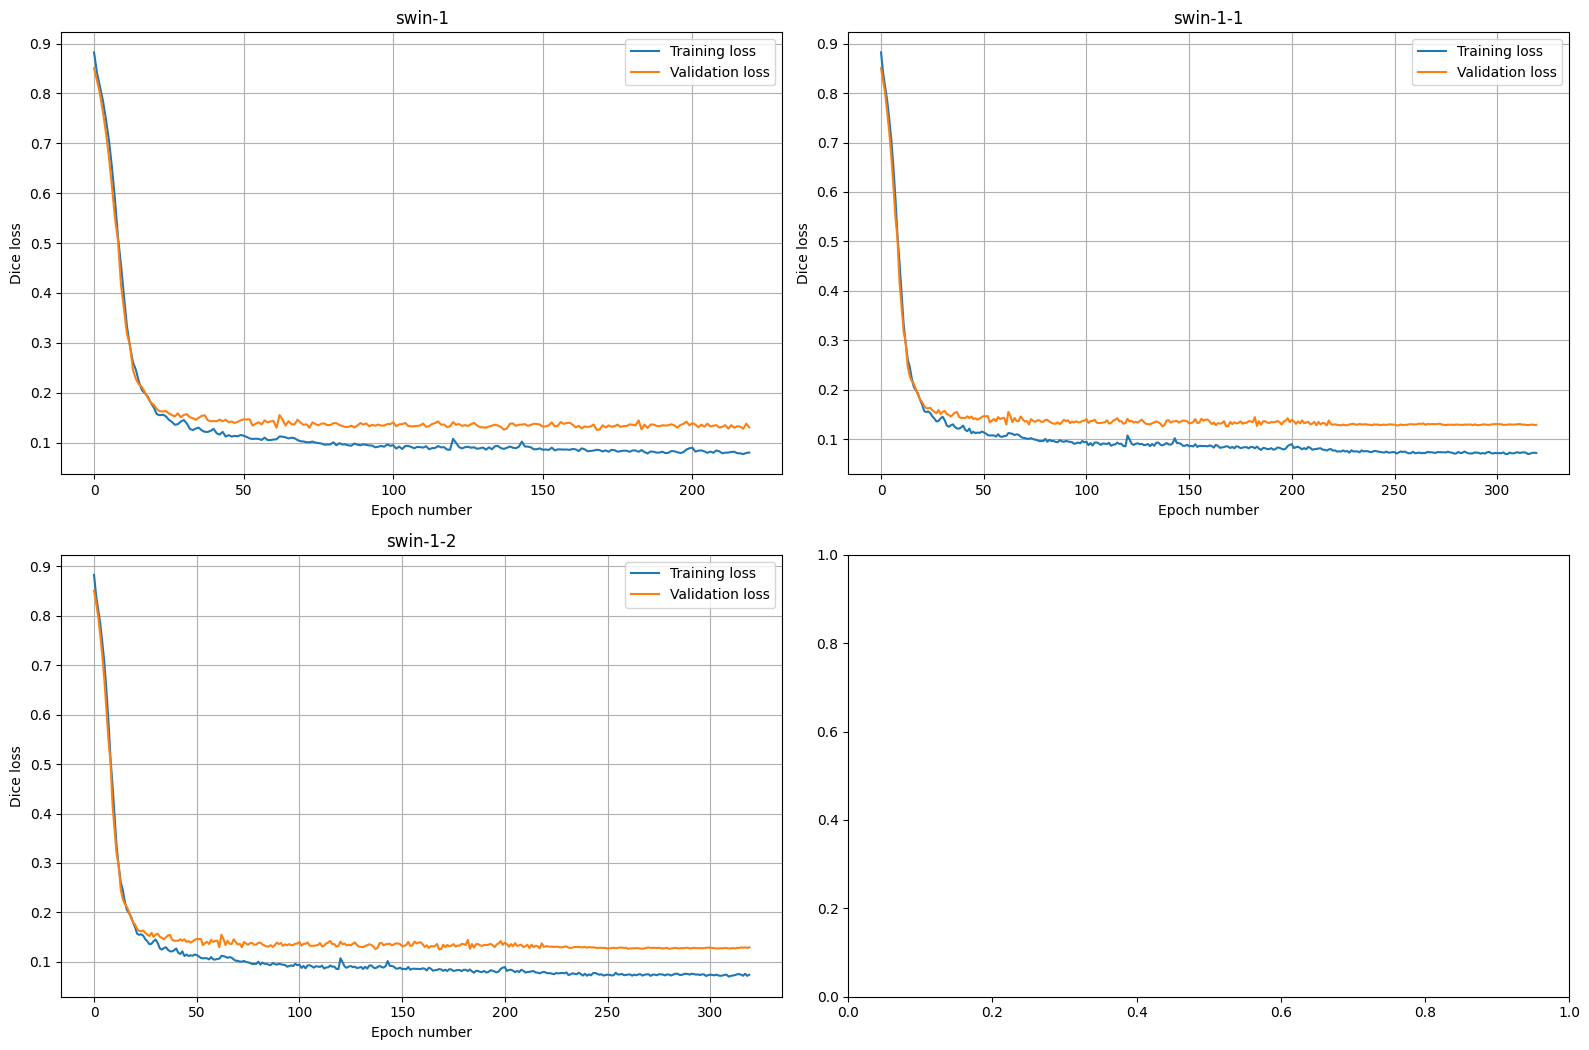

In [28]:
# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10.6))
axs = axs.flatten()  # Flatten the 2D grid into 1D for easier indexing

# Plot each model's loss curves
for i, res in enumerate(results):
    ax = axs[i]
    
    # Plot training and validation loss
    ax.plot(res["train_loss"][:], label='Training loss')
    ax.plot(res["val_loss"][:], label='Validation loss')
    
    ax.set_title(res["name"])
    ax.set_xlabel("Epoch number")
    ax.set_ylabel("Dice loss")
    ax.grid(True)
    ax.legend()


plt.tight_layout()
#plt.savefig("../outputs/generated_figures/SWIN_losses.png", dpi=300, bbox_inches='tight')
plt.show()

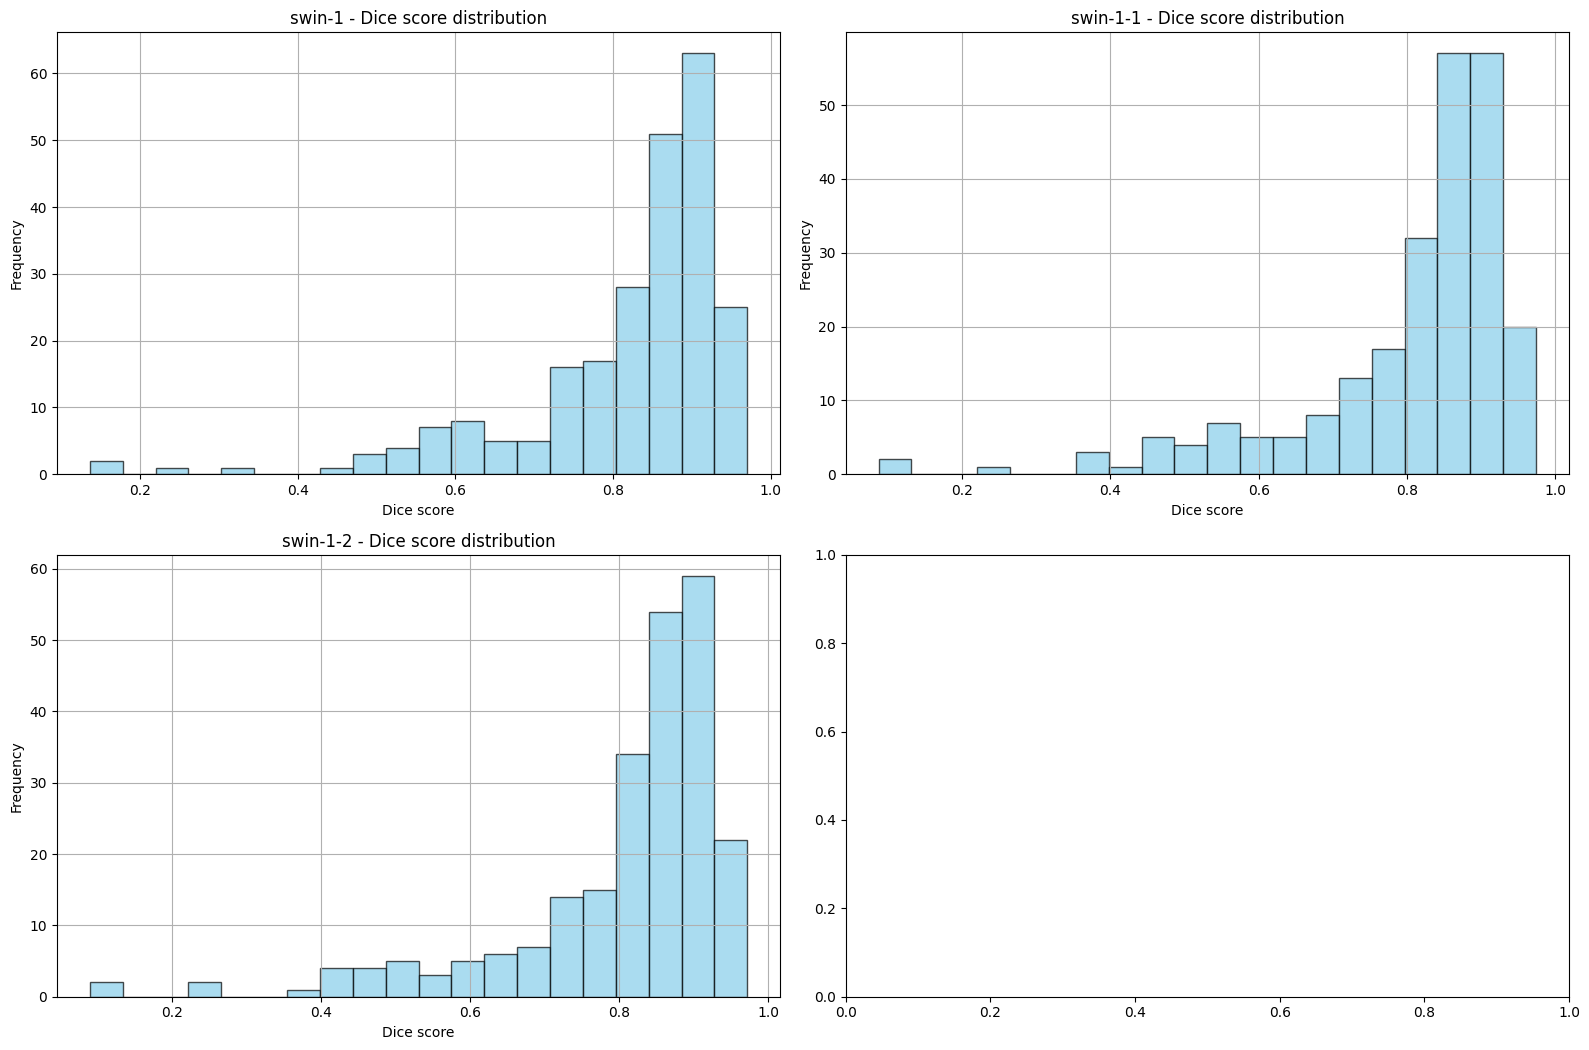

In [29]:
import matplotlib.pyplot as plt

# Set up the 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10.6))
axs = axs.flatten()

# Plot histograms for the first 4 models
for i in range(3):
    res = results[i]
    ax = axs[i]
    
    ax.hist(res['test_dice_scores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{res['name']} - Dice score distribution")
    ax.set_xlabel("Dice score")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
#plt.savefig("../outputs/generated_figures/SWIN_dice_dist.png", dpi=300, bbox_inches='tight')
plt.show()


In [30]:
# Build a list of dictionaries with desired summary information
summary_data = []

for res in results:
    summary_data.append({
        "Name": res["name"],
        "Learning rate": res["lr"],  # Adjust if you stored learning rate elsewhere
        "Epochs": res["epoch_nr"],
        "Unfreezed layers": res["layers_unfreze"],
        "Million parameters": to_4_significant_digits(res["number_of_params"]/1000000),
        "Started from": res["started_from"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/SWIN_summary.tex')
# Display the DataFrame
print(summary_df)

       Name Learning rate  Epochs Unfreezed layers Million parameters  \
0    swin-1          1e-3     220             none              31.12   
1  swin-1-1          1e-4     100           layer4              58.42   
2  swin-1-2          1e-5     100   layer4, layer3              115.7   

  Started from  
0         none  
1       swin-1  
2       swin-1  


In [31]:
# Prepare summary data
summary_data = []

for res in results:
    # Compute training time in hours
    total_seconds = sum(res.get("epoch_durations", []))
    training_time_hours = round(total_seconds / 3600, 3)

    # Build the row dictionary
    summary_data.append({
        "Name": res["name"],
        "Average Dice index": round(res["test_avg_dice"], 3),
        "Training time [hours]": training_time_hours
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/SWIN_results.tex')
# Display the result
print(summary_df)

       Name  Average Dice index  Training time [hours]
0    swin-1               0.819                 14.642
1  swin-1-1               0.805                 19.179
2  swin-1-2               0.805                 35.669


## Evaluation summary
In this part the evaluation of the best performing models from every category was done and the manual overview of the predictions are presented. First, for easier
comparison, the results summarized for the best performing models are visible in the table below
and the distributions of the image level Dice scores are visible in figure below.
A measurement was performed to identify the weaknesses of each model. Images with a
Dice score below 0.6 were considered poor predictions and selected for further analysis.
The unet-4 model had 35 such images, resnet-1-2 had 29, and swin-1 had 21. These
numbers align with the models’ average Dice scores—better-performing models tend to
have fewer poor predictions.
An assumption was made: The set of poorly predicted images for a stronger model should,
ideally, be a subset (or close to a subset) of the set of poorly predicted images for a weaker
model. While this will not hold exactly (except by chance) if it is approximately true, it
would suggest the existence of a shared set of particularly "difficult" images across models.
In the case of the examined models, there were only 3 images in the set of poorly predicted
images for resnet-1-2 (from the 29), which were not in the set of unet-4 (which means
approximately 10%), and these are all the images for which the assumption is not true.
The set for swin-1 is truly a subset of the set for resnet-1-2 and unet-4. This suggests that
there is a set of images that was difficult for all models to accurately predict.

In [32]:
import numpy as np
import torch
from tqdm import tqdm

# List of model subdirectories
path_list = ['unet_4', 'resnet_unfreeze2_2', 'swin_2']
learning_rates = [ "1e-3", "1e-5", "1e-3"]
started_from_models = [ "none", "resnet-1", "none"]
names = [ "unet-4", "resnet-1-2", "swin-1"]
epochs = [100, 100, 220]

models_list = [
    UNet(img_channels= 3, mask_channels= 1, base_channel_size= 32, depth= 5),
    UNetResNet34(img_channels = 3, mask_channels = 1, base_channel_size = 64),
    UNetSwin(img_channels = 3, mask_channels = 1, base_channel_size = 64)
]

# A list to store all evaluation results for later processing
results = []

# Iterate through all models and evaluate
for idx, path in enumerate(path_list, 1):
    print(f"\nProcessing model: {idx}/{len(path_list)} ({path})")

    # Initialize model and loss function
    model = models_list[idx-1]
    loss_fn = DiceLoss()

    # Load model training statistics
    model_dir = f'../saved_models/{path}'
    dice_idcs = list(np.load(f'{model_dir}/dice_idcs.npy'))
    epoch_dice_idcs = list(np.load(f'{model_dir}/epoch_dice_idcs.npy'))
    val_dice_idcs = list(np.load(f'{model_dir}/val_dice_idcs.npy'))
    train_loss = list(np.load(f'{model_dir}/train_loss.npy'))
    val_loss = list(np.load(f'{model_dir}/val_loss.npy'))
    epoch_durations = list(np.load(f'{model_dir}/epoch_durations.npy'))

    # Load best weights
    model.load_state_dict(torch.load(f'{model_dir}/best_model_wts.pth', weights_only=True))
    model.eval().cuda()

    # Evaluate on test set
    avg_score, score_list, preds = evaluate_dice_index(model, test_dataset)

    # Store everything in a dictionary
    result_entry = {
        "name": names[idx-1],
        "dice_idcs": dice_idcs,
        "epoch_dice_idcs": epoch_dice_idcs,
        "val_dice_idcs": val_dice_idcs,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "epoch_durations" :epoch_durations,
        "test_avg_dice": avg_score,
        "test_dice_scores": score_list,
        "test_predictions": preds,
        "number_of_params": count_trainable_parameters(model),
        "epoch_nr": epochs[idx-1],
        "lr": learning_rates[idx-1],
        "started_from": started_from_models[idx-1]
    }

    # Append results
    results.append(result_entry)

print("\nAll models processed.")


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Processing model: 1/3 (unet_4)

Processing model: 2/3 (resnet_unfreeze2_2)

Processing model: 3/3 (swin_2)

All models processed.


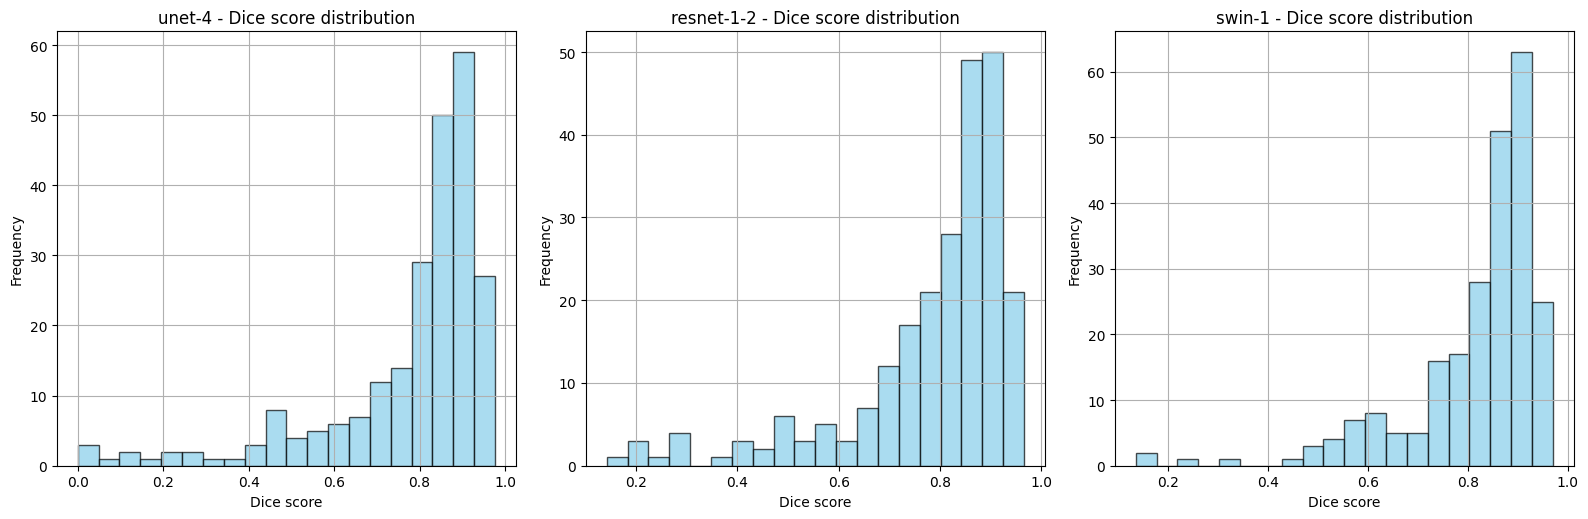

In [33]:
import matplotlib.pyplot as plt

# Set up the 2x2 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(16, 5.3))
axs = axs.flatten()

# Plot histograms for the first 4 models
for i in range(3):
    res = results[i]
    ax = axs[i]
    
    ax.hist(res['test_dice_scores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{res['name']} - Dice score distribution")
    ax.set_xlabel("Dice score")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
#plt.savefig("../outputs/generated_figures/summary_dice_dist.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Prepare summary data
summary_data = []

for res in results:
    # Compute training time in hours
    total_seconds = sum(res.get("epoch_durations", []))
    training_time_hours = round(total_seconds / 3600, 3)

    # Build the row dictionary
    summary_data.append({
        "Name": res["name"],
        "Average Dice index": round(res["test_avg_dice"], 3),
        "Training time [hours]": training_time_hours
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
#generate_latex_table_thesis(summary_df, '../outputs/tables/summary_results.tex')
# Display the result
print(summary_df)

         Name  Average Dice index  Training time [hours]
0      unet-4               0.780                  2.213
1  resnet-1-2               0.786                  3.650
2      swin-1               0.819                 14.642


### Manual analysis of the results:

In [35]:
sorted_scores_list = []
original_indices_list= []
for i in range(3):
    preds = results[i]["test_predictions"]
    score_list = results[i]["test_dice_scores"]
    score_list_filtered = [x for x in score_list if x <= 0.15]

    # Sort the scores and keep track of original indices
    sorted_pairs = sorted(enumerate(score_list_filtered), key=lambda x: x[1])

    # Extract the sorted scores and their original indices
    sorted_scores = [score for idx, score in sorted_pairs]
    original_indices = [idx for idx, score in sorted_pairs]

    sorted_scores_list.append(sorted_scores)
    original_indices_list.append(original_indices)

In [36]:
sorted_scores_list = []
original_indices_list= []
for i in range(3):
    preds = results[i]["test_predictions"]
    score_list = results[i]["test_dice_scores"]

    # Sort the scores and keep track of original indices
    sorted_pairs = sorted(enumerate(score_list), key=lambda x: x[1])

    # Extract the sorted scores and their original indices
    sorted_scores = [score for idx, score in sorted_pairs]
    original_indices = [idx for idx, score in sorted_pairs]
    sorted_scores = np.array(sorted_scores)
    original_indices = np.array(original_indices)
    
    mask = sorted_scores < 0.6
    
    sorted_scores = sorted_scores[mask]
    original_indices = original_indices[mask]
    
    sorted_scores_list.append(sorted_scores)
    original_indices_list.append(original_indices)
    print(len(original_indices))

print(original_indices_list)

arrays = original_indices_list


# Step 1: Sort arrays by length (descending), while keeping original arrays
sorted_arrays = sorted(arrays, key=len, reverse=True)
#print(sorted_arrays)
for i, reference in enumerate(sorted_arrays):
    reference_set = set(reference)
    count = 0
    for j in range(i+1, len(sorted_arrays)):
        for x in sorted_arrays[j]:
            if x not in reference_set:
                count += 1
        print(f"The array nr. {j} has {count} items which are not in reference array nr. {i}. This is {count/len(sorted_arrays[j])*100} %")
        count = 0

35
29
21
[array([162, 124,  77,  36,  14,  81, 212, 166, 137, 165, 176, 143,  15,
        83, 103, 172, 195, 180, 127, 134, 160,  26, 144,  22,  40,  95,
         9,  11,  69, 126,  61,  54, 129, 119, 200]), array([ 36, 162,  77,  81, 124, 176,  14, 165, 212,  15, 180, 137, 166,
        40,  83, 143, 172, 103, 127, 130, 129,  26,  95, 144,  49,  22,
         1, 160,  54]), array([162,  36, 124, 212, 129, 165, 144,  81,  95, 176, 143,  77, 172,
       137, 166,  40, 180,  15, 160, 127,  83])]
The array nr. 1 has 3 items which are not in reference array nr. 0. This is 10.344827586206897 %
The array nr. 2 has 0 items which are not in reference array nr. 0. This is 0.0 %
The array nr. 2 has 0 items which are not in reference array nr. 1. This is 0.0 %


Some examples from the set of poorly predicted images are presented in the figure below. The
first and third images are of poor quality, blurry images, and also the colors of the images
are similar. Maybe this color was underrepresented in the training set. In the second
image, there is probably a horizontal concrete surface, which was cracked and a part of
the concrete surface has been removed and the hole is filled with dust. In the last picture,
there is a shaded groove in the concrete. These two cases are not very typical and probably
underrepresented in the training set.

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\core\composition.py:375: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  super().__init__(
C:\Users\Csaba\AppData\Local\Temp\ipykernel_13616\1108499977.py:130: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  image = np.transpose(np.array(bundle['image']), (1, 2, 0))
C:\Users\Csaba\AppData\Local\Temp\ipykernel_13616\1108499977.py:131: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapti

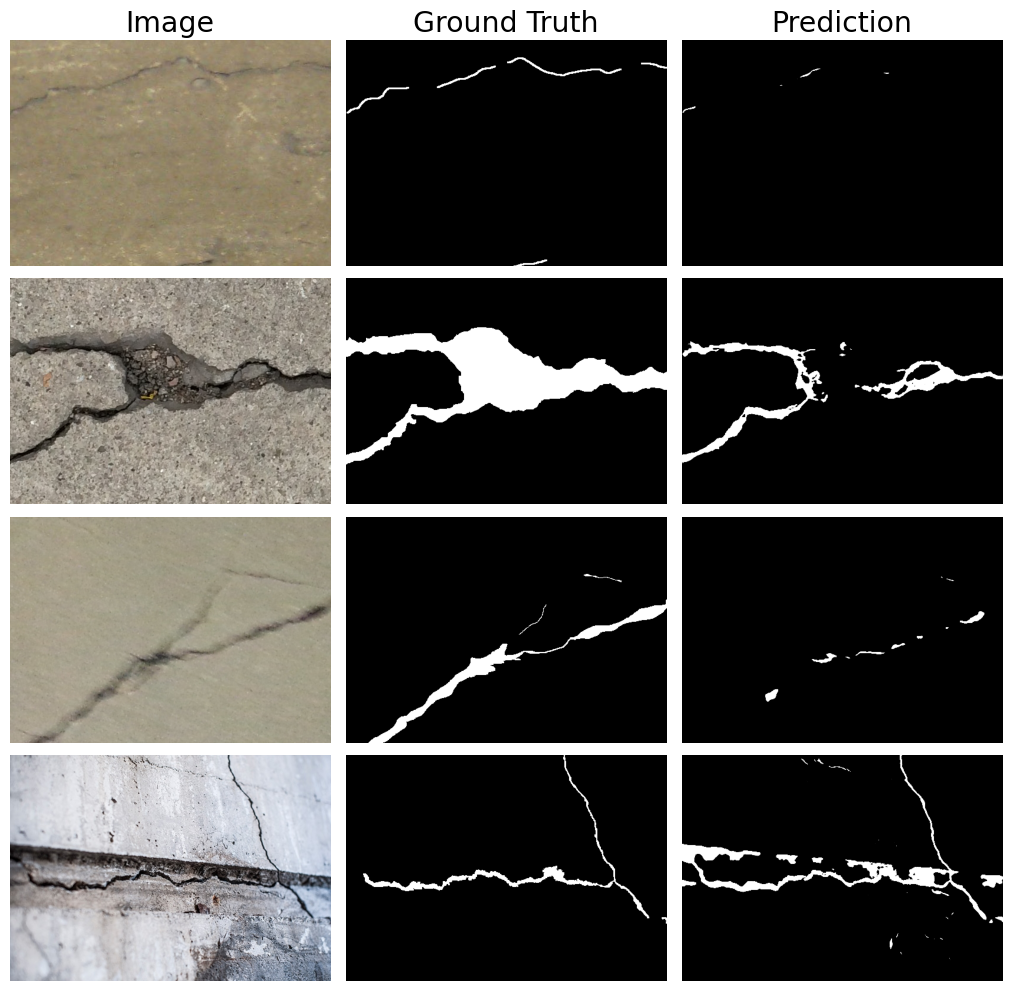

In [53]:
test_dataset.disable_transform()
images_to_list = original_indices[0:50]
triplets = []
indexes = [1, 4, 5, 6]
for i in indexes:
    # convert to orixinal index
    idx = images_to_list[i]
    pair = test_dataset.get_image_and_mask(idx)
    pred = preds[idx].cpu().numpy()
    triplets.append([pair[0], pair[1], pred])
#plot_image_mask_prediction_grid(triplets, columns=1, scale = 20, path = "../outputs/generated_figures/difficult_images_examples.png")
plot_image_mask_prediction_grid(triplets, columns=1, scale = 10)

# Conclusion

Many experiments were conducted using different architectures and hyperparameter settings. One key conclusion is that transfer learning proves to be a very effective technique in
the domain of concrete crack detection. The ResNet backbone offered some improvement, but the SWIN Transformer, with its significantly larger number of parameters and better
generalization capabilities, achieved a notable performance boost. Given its strong results—albeit with long training times—it would be worthwhile to explore more lightweight
versions of the SWIN models, such as SWIN-Small or SWIN-Tiny.
However, while increasing the number of pre-trained parameters often improves performance, increasing the number of trainable parameters can sometimes worsen the results
due to overfitting, especially when using a relatively small dataset (only 300 samples).
To address this issue, more advanced data augmentation techniques can be applied, such
as random Gaussian noise, elastic transformations, or shadow simulation, all of it are
available in the albumentations library which used in this work for basic augmentation.
Although collecting more data is always beneficial, it is often expensive, particularly for
segmentation tasks where creating pixel-level masks is a labor-intensive process. Nevertheless, for the task of concrete crack detection, several additional public datasets are
available online, and incorporating them into training or evaluation could be a valuable
next step.
Even with the best-performing model, some test images resulted in very poor predictions.
This underscores the importance of putting more effort into data preprocessing and augmentation. A deeper analysis of these poorly predicted images—and understanding how
(or whether) they are represented in the training set—would be an important direction
for future work.